# Data Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 

#### Data overview 

In [5]:
# Load the dataset
df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,CUST000001,Customer_1,Male,25,CA,Los Angeles,Branch B,Checking,TXN000000001,2023-01-01 00:00:00,...,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,+1-240-2997,Gift,customer2148@bank.com
1,CUST000002,Customer_2,Female,58,FL,New York,Branch C,Savings,TXN000000002,2023-01-01 00:01:00,...,Luxury,7833.088780,Web,TX,Android,0,USD,+1-641-1940,Payment,customer8393@bank.com
2,CUST000003,Customer_3,Female,71,PA,Dallas,Branch A,Savings,TXN000000003,2023-01-01 00:02:00,...,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,+1-685-4317,Subscription,customer8594@bank.com
3,CUST000004,Customer_4,Female,27,NY,Chicago,Branch A,Savings,TXN000000004,2023-01-01 00:03:00,...,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,+1-650-5207,Subscription,customer1396@bank.com
4,CUST000005,Customer_5,Male,28,OH,Philadelphia,Branch B,Savings,TXN000000005,2023-01-01 00:04:00,...,Electronics,4877.511195,Web,PA,Linux,0,CAD,+1-995-5816,Gift,customer1126@bank.com


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [9]:
df.isnull().sum()


Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [11]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Weekday'] = df['Transaction_Date'].dt.weekday  

In [13]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Category'] = df['Transaction_Time'].apply(categorize_time)

C:\Users\yangj\AppData\Local\Temp\ipykernel_24816\3243298511.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


In [14]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,CUST000001,Customer_1,Male,25,CA,Los Angeles,Branch B,Checking,TXN000000001,2023-01-01 00:00:00,...,0,USD,+1-240-2997,Gift,customer2148@bank.com,2023,1,1,6,Night
1,CUST000002,Customer_2,Female,58,FL,New York,Branch C,Savings,TXN000000002,2023-01-01 00:01:00,...,0,USD,+1-641-1940,Payment,customer8393@bank.com,2023,1,1,6,Night
2,CUST000003,Customer_3,Female,71,PA,Dallas,Branch A,Savings,TXN000000003,2023-01-01 00:02:00,...,0,EUR,+1-685-4317,Subscription,customer8594@bank.com,2023,1,1,6,Night
3,CUST000004,Customer_4,Female,27,NY,Chicago,Branch A,Savings,TXN000000004,2023-01-01 00:03:00,...,0,CAD,+1-650-5207,Subscription,customer1396@bank.com,2023,1,1,6,Night
4,CUST000005,Customer_5,Male,28,OH,Philadelphia,Branch B,Savings,TXN000000005,2023-01-01 00:04:00,...,0,CAD,+1-995-5816,Gift,customer1126@bank.com,2023,1,1,6,Night


#### Drop column

In [18]:
df = df.drop_duplicates()


In [20]:
# Assuming df is your DataFrame
unique_counts = df[['Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Transaction_Weekday']].nunique()

print(unique_counts)


Transaction_Year        1
Transaction_Month       5
Transaction_Day        31
Transaction_Weekday     7
dtype: int64


In [22]:
df_new = df.drop(columns=['Customer_ID', 'Customer_Name', 
                          'Transaction_ID', 'Merchant_ID',
                          'Transaction_Date','Transaction_Time','Transaction_Year',
                          'Customer_Contact', 'Customer_Email'])

df_new.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,25,CA,Los Angeles,Branch B,Checking,102.690676,Online,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,Gift,1,1,6,Night
1,Female,58,FL,New York,Branch C,Savings,83.034624,ATM Withdrawal,Luxury,7833.088780,Web,TX,Android,0,USD,Payment,1,1,6,Night
2,Female,71,PA,Dallas,Branch A,Savings,51.521278,ATM Withdrawal,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,Subscription,1,1,6,Night
3,Female,27,NY,Chicago,Branch A,Savings,74.897156,ATM Withdrawal,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,Subscription,1,1,6,Night
4,Male,28,OH,Philadelphia,Branch B,Savings,5.000000,Online,Electronics,4877.511195,Web,PA,Linux,0,CAD,Gift,1,1,6,Night


In [24]:
df_new.to_csv('new_dataset.csv', index=False) 


In [25]:
print(df_new['Is_Fraud'].value_counts(normalize=True))

Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64


In [28]:
import os
print("path：", os.getcwd())


path： C:\Users\yangj\McGill MMA\INSY 695


In [30]:
df_new = pd.read_csv("new_dataset.csv")

#### Create a Test Set

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=0.2, stratify=df_new['Is_Fraud'], random_state=42)


print("Train Set Class Distribution:\n", train_set['Is_Fraud'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['Is_Fraud'].value_counts(normalize=True))


Train Set Class Distribution:
 Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64
Test Set Class Distribution:
 Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64


#### Categorical into Numerical 

In [36]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold


categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()

 
dummy_encode_cols = []  
label_encode_cols = []  
freq_encode_cols = []  
target_encode_cols = []

for col in categorical_cols:
    num_unique = train_set[col].nunique()

    if num_unique < 5:
        dummy_encode_cols.append(col)  # One-Hot Encoding
    elif num_unique <= 20:
        label_encode_cols.append(col)  # Label Encoding
    elif num_unique <= 50:
        freq_encode_cols.append(col)  # Frequency Encoding
    else:
        target_encode_cols.append(col)  # Target Encoding

print("Dummy Encoding:", dummy_encode_cols)
print("Label Encoding:", label_encode_cols)
print("Frequency Encoding:", freq_encode_cols)
print("Target Encoding:", target_encode_cols)



Dummy Encoding: ['Gender', 'Bank_Branch', 'Account_Type', 'Transaction_Type', 'Transaction_Device', 'Transaction_Currency', 'Time_Category']
Label Encoding: ['State', 'City', 'Merchant_Category', 'Transaction_Location', 'Device_Type', 'Transaction_Description']
Frequency Encoding: []
Target Encoding: []


In [38]:
# 1. Dummy Encoding
train_set = pd.get_dummies(train_set, columns=dummy_encode_cols, drop_first=True)
test_set = pd.get_dummies(test_set, columns=dummy_encode_cols, drop_first=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(0, inplace=True)

# 2. Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])  
    test_set[col] = test_set[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)  
    label_encoders[col] = le  

# 3. Frequency Encoding
for col in freq_encode_cols:
    freq_map = train_set[col].value_counts(normalize=True).to_dict()
    train_set[col] = train_set[col].map(freq_map)
    test_set[col] = test_set[col].map(freq_map).fillna(train_set[col].mean())

# 4. K-Fold Target Encoding
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for col in target_encode_cols:
    train_set[col + '_target_enc'] = 0 
    for train_idx, val_idx in kf.split(train_set):
        train_fold = train_set.iloc[train_idx].copy()
        val_fold = train_set.iloc[val_idx].copy()

        mean_target = train_fold.groupby(col)['Is_Fraud'].mean()
        train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean())

    test_set[col + '_target_enc'] = test_set[col].map(train_set.groupby(col)['Is_Fraud'].mean()).fillna(train_set['Is_Fraud'].mean())

train_set.drop(columns=target_encode_cols, inplace=True)
test_set.drop(columns=target_encode_cols, inplace=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(train_set.mean(), inplace=True)

print(f'Processed train set shape: {train_set.shape}')
print(f'Processed test set shape: {test_set.shape}')

Processed train set shape: (160000, 30)
Processed test set shape: (40000, 30)


In [39]:
# Check for remaining categorical columns
remaining_categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()
print("Remaining categorical columns:", remaining_categorical_cols)


Remaining categorical columns: []


In [40]:
print(train_set.dtypes)
print(train_set.head())  # To visually inspect the transformed data


Age                                  int64
State                                int32
City                                 int32
Transaction_Amount                 float64
Merchant_Category                    int32
Account_Balance                    float64
Transaction_Location                 int32
Device_Type                          int32
Is_Fraud                             int64
Transaction_Description              int32
Transaction_Month                    int64
Transaction_Day                      int64
Transaction_Weekday                  int64
Gender_Male                           bool
Bank_Branch_Branch B                  bool
Bank_Branch_Branch C                  bool
Bank_Branch_Branch D                  bool
Account_Type_Checking                 bool
Account_Type_Savings                  bool
Transaction_Type_Online               bool
Transaction_Type_POS                  bool
Transaction_Device_Mobile             bool
Transaction_Device_POS Terminal       bool
Transaction

In [41]:
print("Dummy encoded columns example:")
print([col for col in train_set.columns if any(col.startswith(prefix) for prefix in dummy_encode_cols)])


Dummy encoded columns example:
['Gender_Male', 'Bank_Branch_Branch B', 'Bank_Branch_Branch C', 'Bank_Branch_Branch D', 'Account_Type_Checking', 'Account_Type_Savings', 'Transaction_Type_Online', 'Transaction_Type_POS', 'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal', 'Transaction_Device_Web', 'Transaction_Currency_EUR', 'Transaction_Currency_GBP', 'Transaction_Currency_USD', 'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night']


In [42]:
print("Unique values in label-encoded columns:")
for col in label_encode_cols:
    print(f"{col}: {train_set[col].unique()}")


Unique values in label-encoded columns:
State: [6 2 0 5 1 3 4]
City: [3 1 5 4 6 2 0]
Merchant_Category: [4 5 0 3 1 2]
Transaction_Location: [5 3 6 1 7 0 9 8 4 2]
Device_Type: [2 0 1 4 5 3]
Transaction_Description: [4 3 2 0 1]


#### Feature Importance

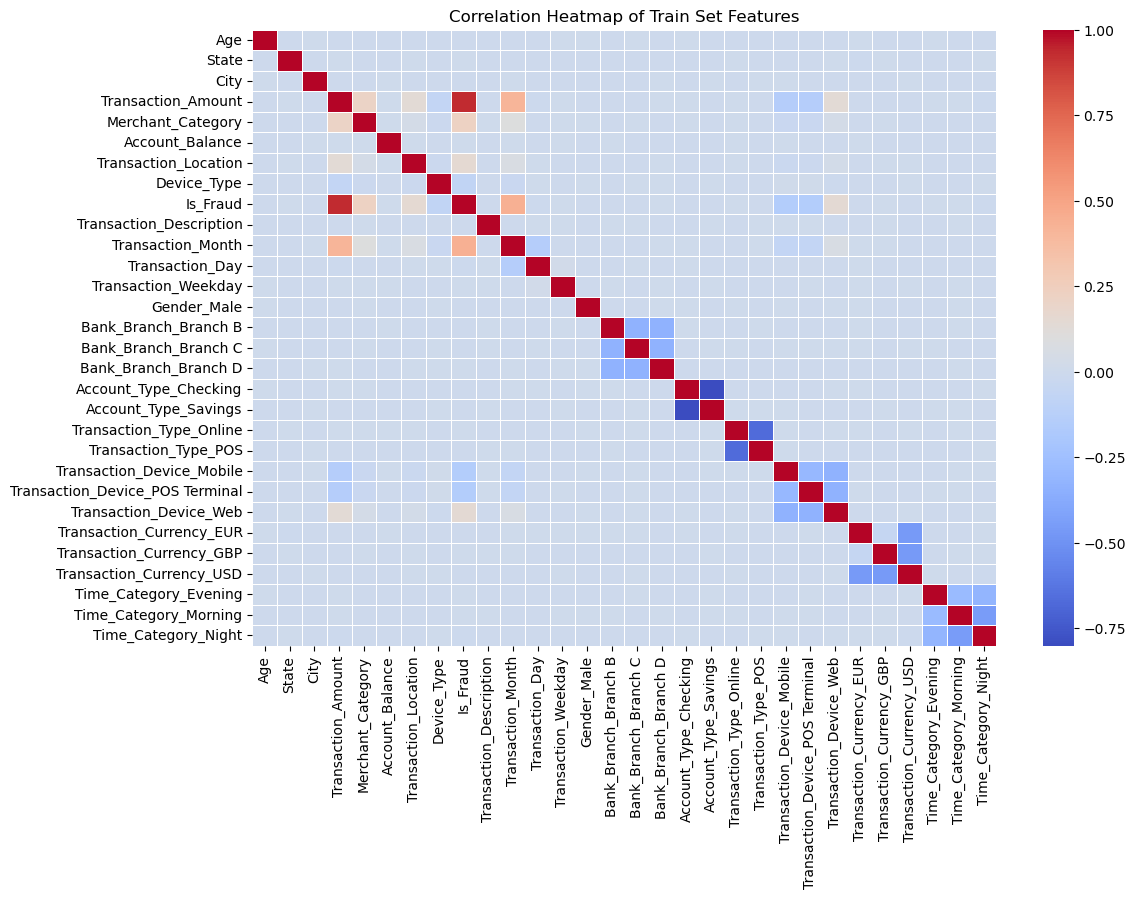

In [49]:
#import seaborn as sns
#import matplotlib.pyplot as plt


correlation_matrix = train_set.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Train Set Features")
plt.show()


In [51]:
fraud_correlation = train_set.corr()['Is_Fraud'].sort_values(ascending=False)
print(fraud_correlation)


Is_Fraud                           1.000000
Transaction_Amount                 0.936302
Transaction_Month                  0.438388
Merchant_Category                  0.225032
Transaction_Location               0.149990
Transaction_Device_Web             0.144429
Time_Category_Morning              0.004222
Bank_Branch_Branch D               0.003048
State                              0.002176
Time_Category_Evening              0.001910
Transaction_Weekday                0.001634
Transaction_Currency_GBP           0.001495
Account_Balance                    0.001195
Transaction_Type_Online            0.001137
Account_Type_Checking              0.000850
Age                               -0.000165
Transaction_Currency_EUR          -0.000187
City                              -0.000879
Transaction_Currency_USD          -0.000961
Bank_Branch_Branch B              -0.001141
Transaction_Type_POS              -0.001351
Account_Type_Savings              -0.002133
Transaction_Description         

In [53]:

threshold = 0.6
correlation_matrix = train_set.corr()

# Identify highly correlated features, excluding self-correlation
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Avoid duplicates
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr_features.add((col1, col2))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2"])


# Print the first few rows
print(high_corr_df.head())

# Or, if using Jupyter Notebook, display a clean table
from IPython.display import display
display(high_corr_df)



                 Feature 1             Feature 2
0    Account_Type_Checking  Account_Type_Savings
1       Transaction_Amount              Is_Fraud
2  Transaction_Type_Online  Transaction_Type_POS


,Feature 1,Feature 2
0,Account_Type_Checking,Account_Type_Savings
1,Transaction_Amount,Is_Fraud
2,Transaction_Type_Online,Transaction_Type_POS


Transaction_Amount vs Is_Fraud

<Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>

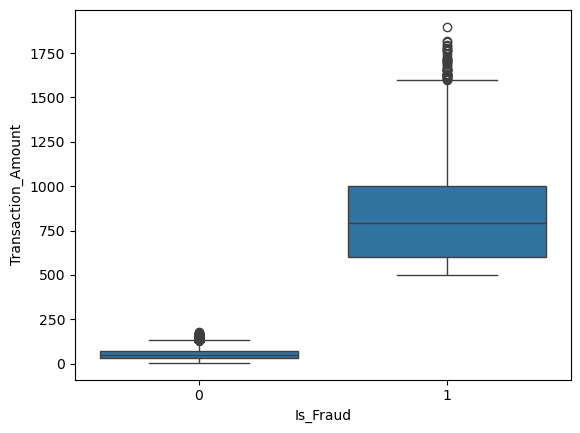

In [56]:
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=train_set)


In [58]:
correlation_matrix.loc[["Transaction_Amount", "Transaction_Type_Online", "Account_Type_Checking"],
                       ["Is_Fraud", "Transaction_Type_POS", "Account_Type_Savings"]]


,Is_Fraud,Transaction_Type_POS,Account_Type_Savings
Transaction_Amount,0.936302,-0.000714,-0.002207
Transaction_Type_Online,0.001137,-0.667944,0.001468
Account_Type_Checking,0.000850,-0.002653,-0.801070


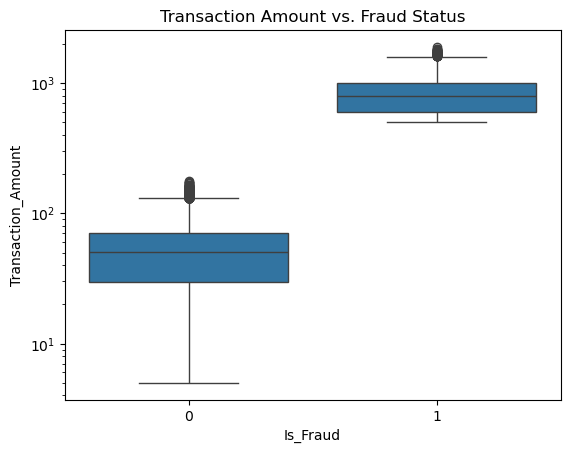

In [60]:


sns.boxplot(x="Is_Fraud", y="Transaction_Amount", data=train_set)
plt.yscale("log")  # Log scale to see outliers better
plt.title("Transaction Amount vs. Fraud Status")
plt.show()


In [62]:
print(train_set.groupby("Is_Fraud")["Transaction_Amount"].describe())


             count        mean         std    min         25%         50%  \
Is_Fraud                                                                    
0         148800.0   50.894869   28.173358    5.0   29.761953   50.110801   
1          11200.0  822.803931  259.658877  500.0  598.459334  795.079908   

                 75%          max  
Is_Fraud                           
0          70.242580   175.825322  
1         998.685954  1897.869419  


In [64]:
train_set["Transaction_Amount"] = np.log1p(train_set["Transaction_Amount"])
test_set["Transaction_Amount"] = np.log1p(test_set["Transaction_Amount"])


Transaction_Type_Online vs Transaction_Type_POS

In [67]:
train_set[["Transaction_Type_Online", "Transaction_Type_POS"]].sum()


Transaction_Type_Online    64018
Transaction_Type_POS       64129
dtype: int64

In [69]:
print(train_set.groupby(["Transaction_Type_Online", "Transaction_Type_POS"]).size())


Transaction_Type_Online  Transaction_Type_POS
False                    False                   31853
                         True                    64129
True                     False                   64018
dtype: int64


In [71]:
train_set.drop(columns=["Transaction_Type_POS"], inplace=True)
test_set.drop(columns=["Transaction_Type_POS"], inplace=True)


Account_Type_Checking vs Account_Type_Savings


In [74]:
print(train_set.groupby(["Account_Type_Checking", "Account_Type_Savings"]).size())


Account_Type_Checking  Account_Type_Savings
False                  False                   16089
                       True                    95767
True                   False                   48144
dtype: int64


In [76]:
train_set.drop(columns=["Account_Type_Savings"], inplace=True)
test_set.drop(columns=["Account_Type_Savings"], inplace=True)


In [78]:
for col in train_set.columns:
    print(col)


Age
State
City
Transaction_Amount
Merchant_Category
Account_Balance
Transaction_Location
Device_Type
Is_Fraud
Transaction_Description
Transaction_Month
Transaction_Day
Transaction_Weekday
Gender_Male
Bank_Branch_Branch B
Bank_Branch_Branch C
Bank_Branch_Branch D
Account_Type_Checking
Transaction_Type_Online
Transaction_Device_Mobile
Transaction_Device_POS Terminal
Transaction_Device_Web
Transaction_Currency_EUR
Transaction_Currency_GBP
Transaction_Currency_USD
Time_Category_Evening
Time_Category_Morning
Time_Category_Night


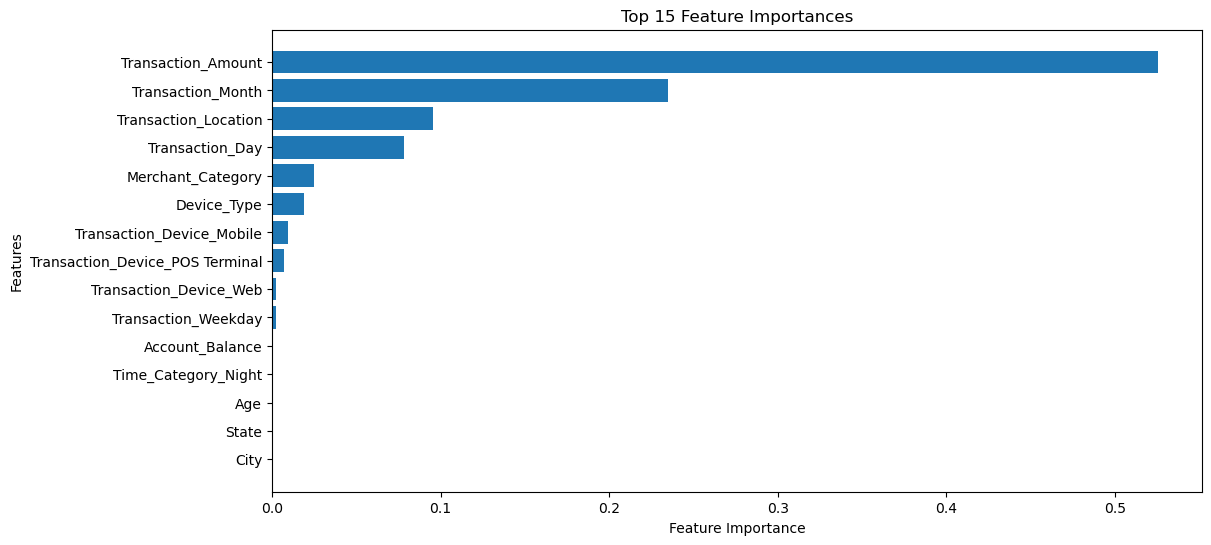

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt

X_train = train_set.drop(columns=['Is_Fraud'])
y_train = train_set['Is_Fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'][:15], feature_importances['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [81]:
low_importance_features = feature_importances[feature_importances['Importance'] < 0.01]
print("Low-importance features:\n", low_importance_features)


Low-importance features:
                             Feature  Importance
18        Transaction_Device_Mobile    0.009720
19  Transaction_Device_POS Terminal    0.006985
20           Transaction_Device_Web    0.002723
11              Transaction_Weekday    0.002138
5                   Account_Balance    0.000134
26              Time_Category_Night    0.000129
0                               Age    0.000104
1                             State    0.000051
2                              City    0.000046
8           Transaction_Description    0.000041
17          Transaction_Type_Online    0.000024
15             Bank_Branch_Branch D    0.000023
14             Bank_Branch_Branch C    0.000022
23         Transaction_Currency_USD    0.000020
16            Account_Type_Checking    0.000017
12                      Gender_Male    0.000017
25            Time_Category_Morning    0.000016
21         Transaction_Currency_EUR    0.000014
22         Transaction_Currency_GBP    0.000012
13            

In [82]:
# Identify low-importance features
low_importance_threshold = 0.0005
drop_columns = feature_importances[feature_importances['Importance'] < low_importance_threshold]['Feature'].tolist()

print("Dropping columns:", drop_columns)

# Ensure only existing columns are dropped in X_train
drop_columns = [col for col in drop_columns if col in X_train.columns]

# Drop from X_train ONLY
X_train = X_train.drop(columns=drop_columns)



Dropping columns: ['Account_Balance', 'Time_Category_Night', 'Age', 'State', 'City', 'Transaction_Description', 'Transaction_Type_Online', 'Bank_Branch_Branch D', 'Bank_Branch_Branch C', 'Transaction_Currency_USD', 'Account_Type_Checking', 'Gender_Male', 'Time_Category_Morning', 'Transaction_Currency_EUR', 'Transaction_Currency_GBP', 'Bank_Branch_Branch B', 'Time_Category_Evening']


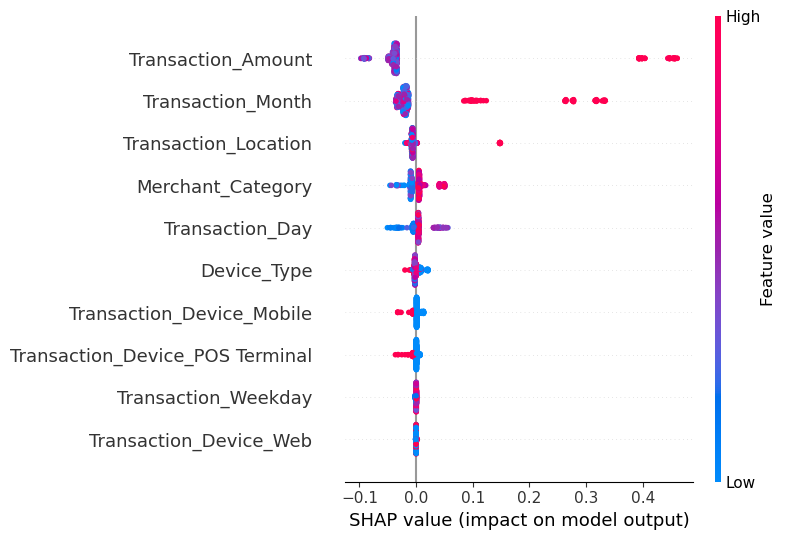

In [83]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Select top 10 most important features based on Random Forest importance
top_features = feature_importances['Feature'][:10].tolist()  
X_train_selected = X_train[top_features]  

# Train a simpler Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_selected, y_train) 

# Take a small sample for SHAP analysis
sample_size = 500  # Adjustable based on performance
X_sample = X_train_selected.sample(sample_size, random_state=42)

# Compute SHAP values
explainer = shap.TreeExplainer(rf) 
shap_values = explainer.shap_values(X_sample)

# Plot SHAP summary for class 1 (fraud)
shap.summary_plot(shap_values[:, :, 1], X_sample)


In [88]:
explainer = shap.KernelExplainer(rf.predict_proba, X_sample)
shap_values = explainer.shap_values(X_sample)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

In [89]:
print("SHAP values shape:", np.array(shap_values).shape)
shap_values[:5]

SHAP values shape: (500, 10, 2)


array([[[ 3.85266667e-02, -3.85266667e-02],
        [ 1.61758889e-02, -1.61758889e-02],
        [ 7.44309257e-03, -7.44309257e-03],
        [ 5.62638888e-03, -5.62638888e-03],
        [ 8.38300665e-03, -8.38300665e-03],
        [ 1.27509154e-03, -1.27509154e-03],
        [-1.66650842e-04,  1.66650842e-04],
        [-1.47979357e-04,  1.47979357e-04],
        [ 2.06123149e-05, -2.06123149e-05],
        [-2.59369717e-05,  2.59369717e-05]],

       [[ 3.88646667e-02, -3.88646667e-02],
        [ 1.72605649e-02, -1.72605649e-02],
        [ 7.46076750e-03, -7.46076750e-03],
        [-1.30515963e-03,  1.30515963e-03],
        [ 8.41751016e-03, -8.41751016e-03],
        [ 1.15477540e-03, -1.15477540e-03],
        [ 5.51087601e-03, -5.51087601e-03],
        [-1.77062580e-04,  1.77062580e-04],
        [-5.29407320e-05,  5.29407320e-05],
        [-2.38173287e-05,  2.38173287e-05]],

       [[ 4.06766667e-02, -4.06766667e-02],
        [ 2.14145991e-02, -2.14145991e-02],
        [ 7.37398666e-03, -7

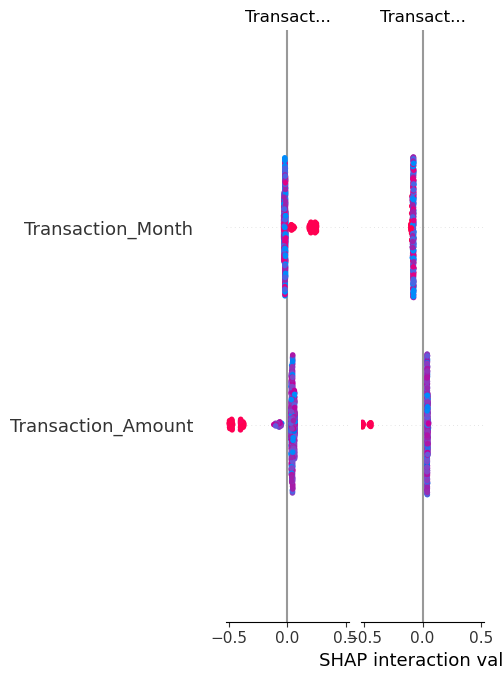

In [90]:
shap.summary_plot(shap_values, X_sample)

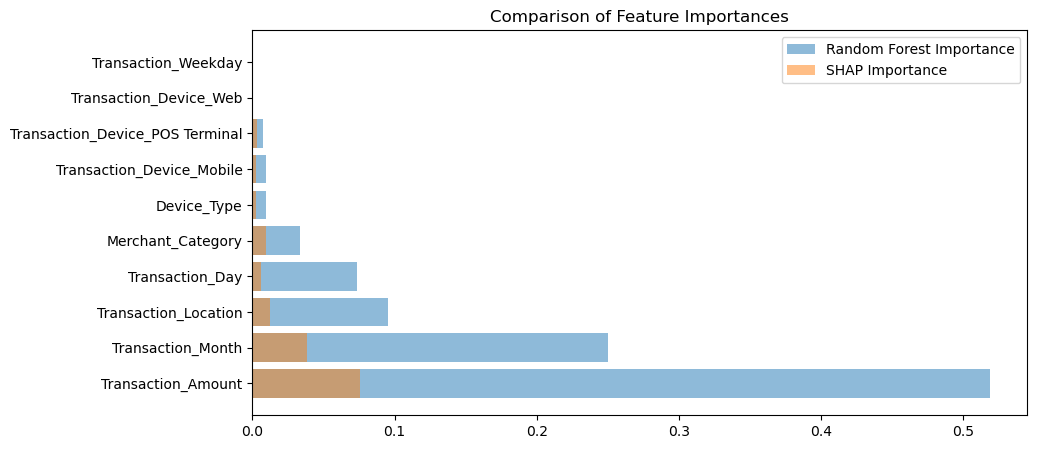

In [91]:
import matplotlib.pyplot as plt
import numpy as np

rf_importances = rf.feature_importances_

shap_importance = np.abs(shap_values).mean(axis=(0,2))

feature_names = X_sample.columns
plt.figure(figsize=(10,5))
plt.barh(feature_names, rf_importances, alpha=0.5, label="Random Forest Importance")
plt.barh(feature_names, shap_importance, alpha=0.5, label="SHAP Importance")
plt.legend()
plt.title("Comparison of Feature Importances")
plt.show()


In [92]:
X_train = X_train.drop(columns=["Transaction_Weekday", "Transaction_Device_Web"])

New_dataset

In [94]:

X_test = test_set.drop(columns=['Is_Fraud'])  
X_test = X_test[X_train.columns]


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [96]:
print("Original columns in train_set:", train_set.columns)
print("Columns after dropping in X_train:", X_train.columns)


Original columns in train_set: Index(['Age', 'State', 'City', 'Transaction_Amount', 'Merchant_Category',
       'Account_Balance', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Description', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Weekday', 'Gender_Male', 'Bank_Branch_Branch B',
       'Bank_Branch_Branch C', 'Bank_Branch_Branch D', 'Account_Type_Checking',
       'Transaction_Type_Online', 'Transaction_Device_Mobile',
       'Transaction_Device_POS Terminal', 'Transaction_Device_Web',
       'Transaction_Currency_EUR', 'Transaction_Currency_GBP',
       'Transaction_Currency_USD', 'Time_Category_Evening',
       'Time_Category_Morning', 'Time_Category_Night'],
      dtype='object')
Columns after dropping in X_train: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object'

In [97]:
print("Remaining columns in X_train:", X_train.columns)
print("Remaining columns in X_test:", X_test.columns)


Remaining columns in X_train: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object')
Remaining columns in X_test: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object')


In [98]:
print(train_set.select_dtypes(include=['object']).columns)
print(test_set.select_dtypes(include=['object']).columns)


Index([], dtype='object')
Index([], dtype='object')


In [99]:

y_test = test_set['Is_Fraud']


train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)


In [100]:
train_set.to_csv("processed_train_set.csv", index=False)
test_set.to_csv("processed_test_set.csv", index=False)

# EDA

In [123]:
!python --version

Python 3.12.4


In [124]:
!pip install matplotlib
!pip install seaborn
!pip install spicy

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 

In [228]:
# Load the dataset
df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,CUST000001,Customer_1,Male,25,CA,Los Angeles,Branch B,Checking,TXN000000001,2023-01-01 00:00:00,...,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,+1-240-2997,Gift,customer2148@bank.com
1,CUST000002,Customer_2,Female,58,FL,New York,Branch C,Savings,TXN000000002,2023-01-01 00:01:00,...,Luxury,7833.088780,Web,TX,Android,0,USD,+1-641-1940,Payment,customer8393@bank.com
2,CUST000003,Customer_3,Female,71,PA,Dallas,Branch A,Savings,TXN000000003,2023-01-01 00:02:00,...,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,+1-685-4317,Subscription,customer8594@bank.com
3,CUST000004,Customer_4,Female,27,NY,Chicago,Branch A,Savings,TXN000000004,2023-01-01 00:03:00,...,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,+1-650-5207,Subscription,customer1396@bank.com
4,CUST000005,Customer_5,Male,28,OH,Philadelphia,Branch B,Savings,TXN000000005,2023-01-01 00:04:00,...,Electronics,4877.511195,Web,PA,Linux,0,CAD,+1-995-5816,Gift,customer1126@bank.com


In [230]:
df.shape

(200000, 24)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [234]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [236]:
df.duplicated().sum()

0

In [238]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,48.469710,105.032620,4995.865781,0.070000
std,17.896964,210.894961,1990.914559,0.255148
min,18.000000,5.000000,0.000000,0.000000
25%,33.000000,31.508303,3646.620917,0.000000
50%,48.000000,52.831014,4987.400530,0.000000
75%,64.000000,75.871259,6343.998115,0.000000
max,79.000000,1897.869419,13631.898149,1.000000


In [240]:
df['Is_Fraud'].value_counts(normalize=True) * 100  # Check fraud percentage

Is_Fraud
0    93.0
1     7.0
Name: proportion, dtype: float64

The fraud distribution shows that 7% of transactions are fraudulent, while 93% are non-fraudulent. This indicates a significant class imbalance, which may affect the model’s ability to detect fraudulent transactions accurately.

In [243]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])

def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Transaction_Time'] = df['Transaction_Time'].apply(categorize_time)

C:\Users\yangj\AppData\Local\Temp\ipykernel_24816\2493909172.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


In [244]:
df['Transaction_Time'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [245]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_year'] = df['Transaction_Date'].dt.year
df['Transaction_month'] = df['Transaction_Date'].dt.month_name()
df['Transaction_day'] = df['Transaction_Date'].dt.day_name()

Univariate Analysis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Transaction_Date'}>],
       [<Axes: title={'center': 'Transaction_Amount'}>,
        <Axes: title={'center': 'Account_Balance'}>],
       [<Axes: title={'center': 'Is_Fraud'}>,
        <Axes: title={'center': 'Transaction_year'}>]], dtype=object)

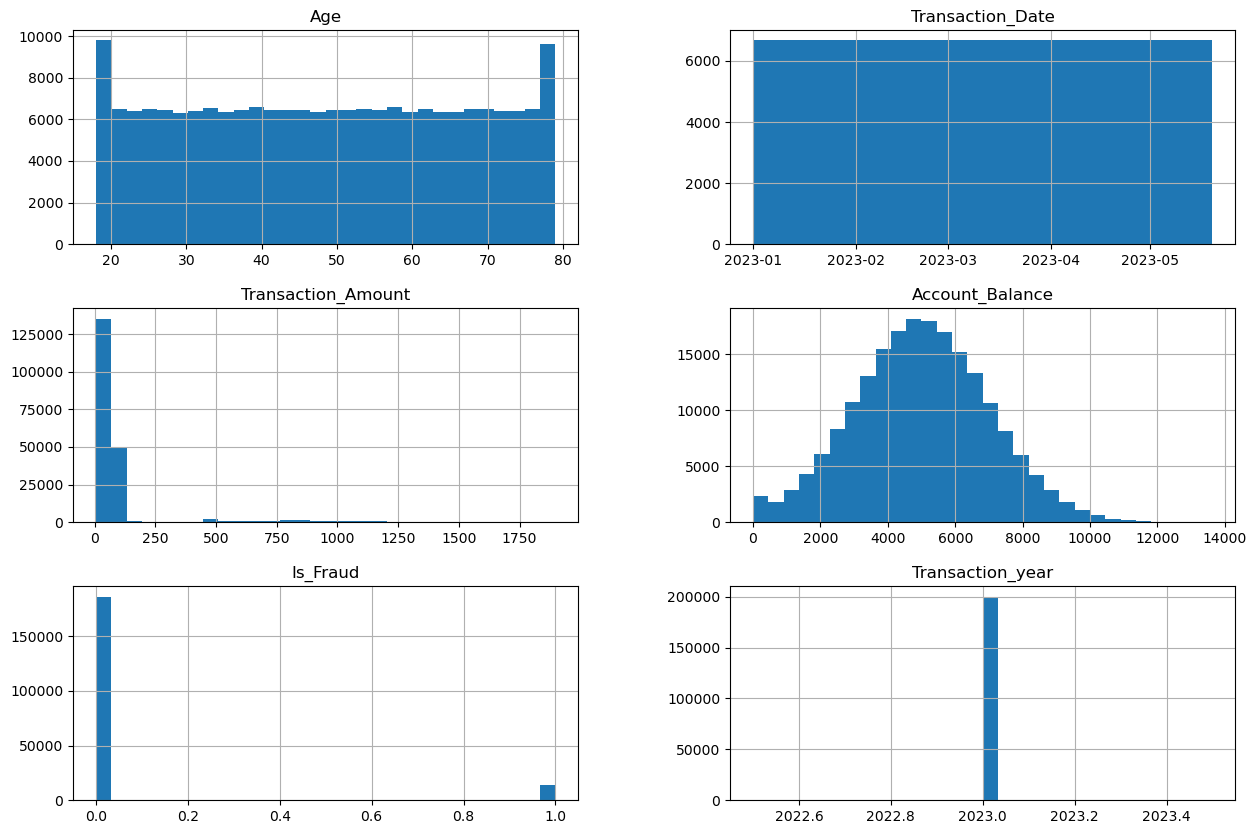

In [250]:
df.hist(figsize=(15, 10), bins=30)

- Age: The distribution is relatively uniform, with spikes at the lower and upper age ranges.
- Transaction Date: Transactions are evenly spread over the recorded time period.
- Transaction Amount: Most transactions are of low amounts, with a heavy right skew indicating a few high-value transactions.
- Account Balance: The distribution is approximately normal, with most balances centered around the middle range.
- Is Fraud: The dataset is highly imbalanced, with significantly more non-fraudulent transactions than fraudulent ones.
- Transaction Year: Most transactions occur within a single year, suggesting a limited time frame for the dataset.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

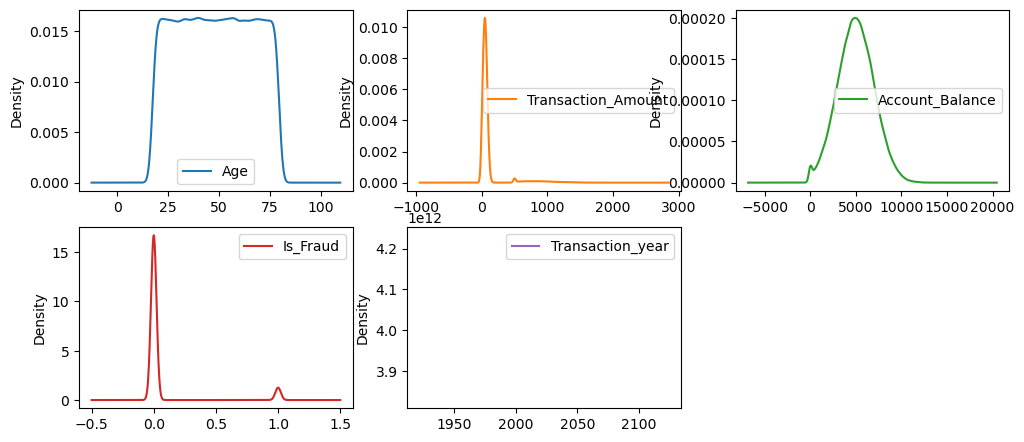

In [253]:
df.select_dtypes(include=['number']).plot(kind='density', subplots=True, layout=(3,3), figsize=(12,8), sharex=False)

<Axes: ylabel='count'>

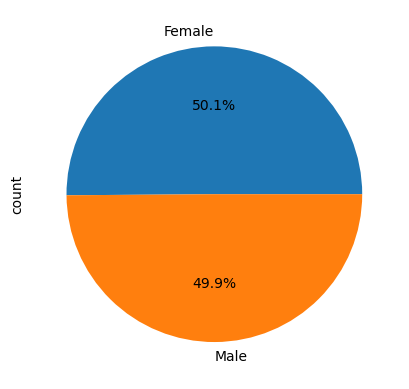

In [254]:
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

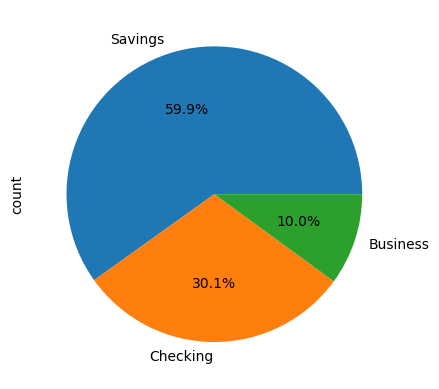

In [255]:
df["Account_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

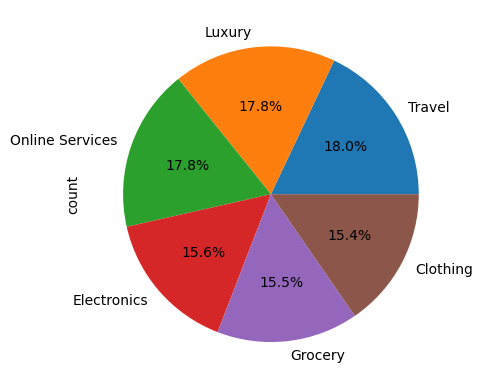

In [256]:
df["Merchant_Category"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

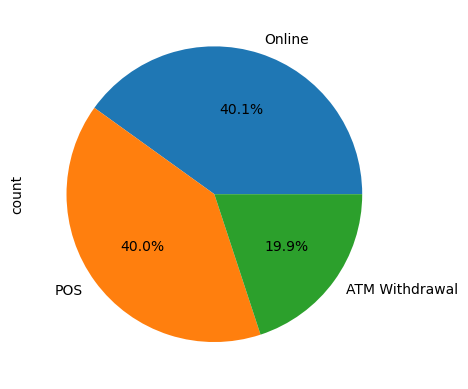

In [257]:
df["Transaction_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

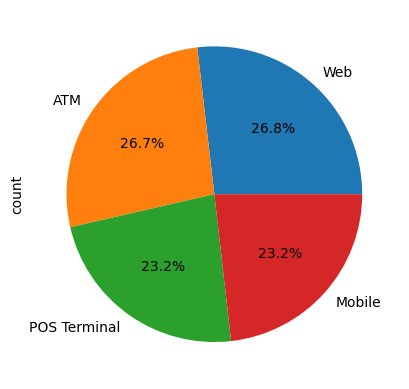

In [258]:
df["Transaction_Device"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

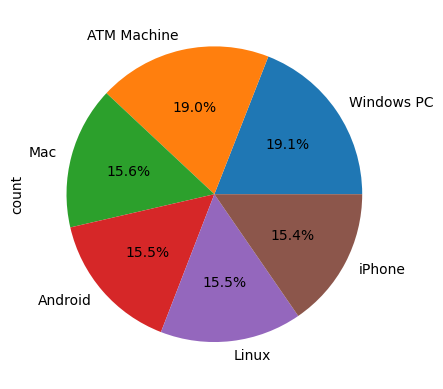

In [259]:
df["Device_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

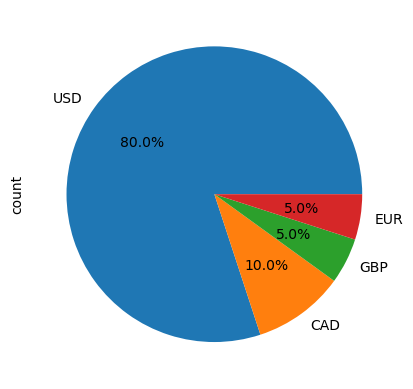

In [260]:
df["Transaction_Currency"].value_counts().plot.pie(autopct="%1.1f%%") 

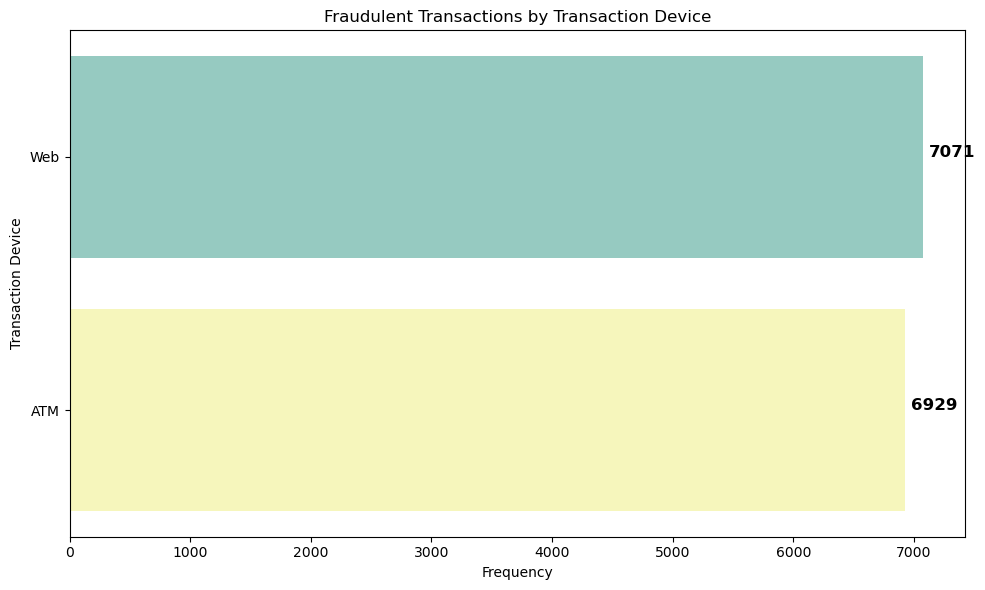

In [261]:
fraud_df = df[df['Is_Fraud'] == 1]
fraud_counts = fraud_df['Transaction_Device'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="Set3", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Device")
plt.title("Fraudulent Transactions by Transaction Device")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


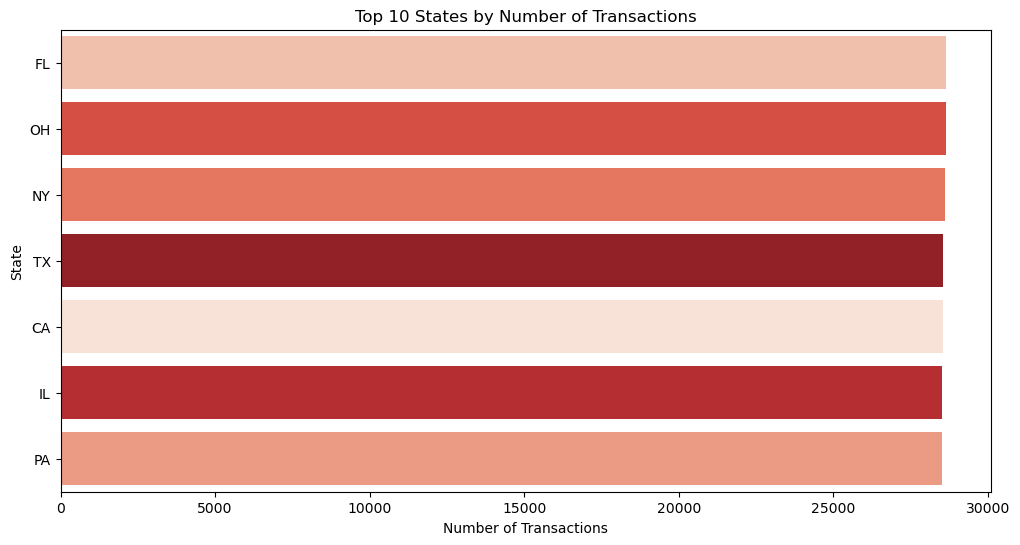

In [262]:
# Transactions by State
plt.figure(figsize=(12, 6))
sns.countplot(y=df['State'], order=df['State'].value_counts().index[:10], hue = df['State'], palette='Reds', legend=False)
plt.title("Top 10 States by Number of Transactions")
plt.ylabel("State")
plt.xlabel("Number of Transactions")
plt.show()

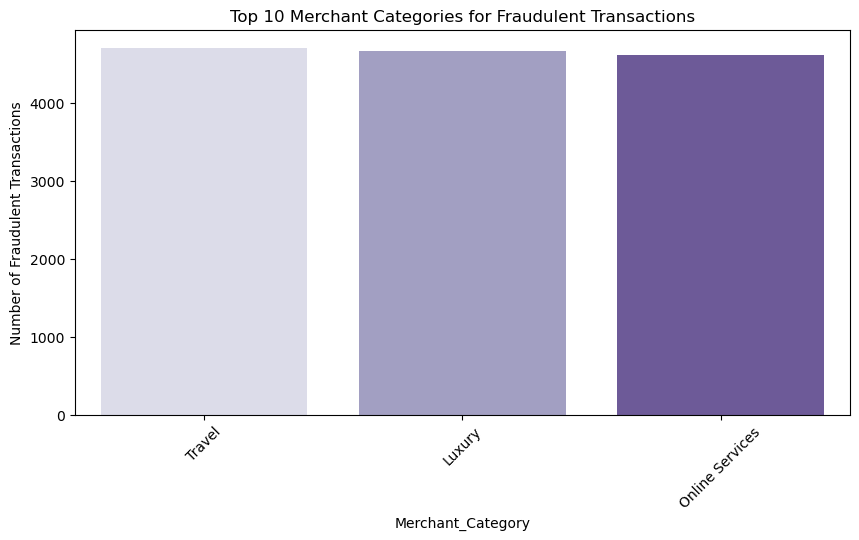

In [263]:
# Fraud by merchant category
fraud_merchant = df[df['Is_Fraud'] == 1]['Merchant_Category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_merchant.index, y=fraud_merchant.values, hue =fraud_merchant.index, palette = "Purples", legend=False)
plt.title("Top 10 Merchant Categories for Fraudulent Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

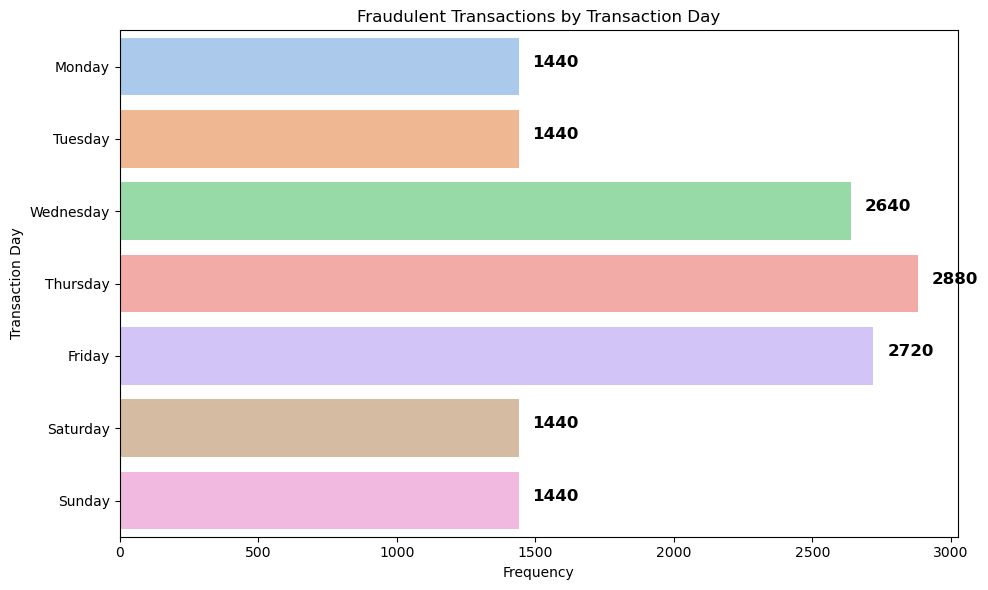

In [264]:
fraud_counts = fraud_df['Transaction_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0  # Ensuring all days are represented
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Day")
plt.title("Fraudulent Transactions by Transaction Day")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()

Observations
- Thursday (2880 fraud cases) has the highest number of fraudulent transactions.
- Friday (2720 cases) and Wednesday (2640 cases) also see a higher number of fraud cases.
- Fraudulent activities increase mid-week (Wednesday–Friday), potentially due to higher transaction volumes. Lower fraud activity on weekends might indicate reduced banking or transaction activity.

Bivariate Analysis

C:\Users\yangj\Anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\yangj\Anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\yangj\Anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Age'>,
        <Axes: xlabel='Account_Balance', ylabel='Age'>,
        <Axes: xlabel='Is_Fraud', ylabel='Age'>,
        <Axes: xlabel='Transaction_year', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Account_Balance', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Transaction_year', ylabel='Transaction_Amount'>],
       [<Axes: xlabel='Age', ylabel='Account_Balance'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Account_Balance'>,
        <Axes: xlabel='Account_Balance', ylabel='Account_Balance'>,
        <Axes: xlabel='Is_Fraud', ylabel='Account_Balance'>,
        <Axes: xlabel='Transaction_year', ylabel='Account_Balance'>],
       [<Axes: xlabel='Age', ylabel='Is_Fraud'>,
        <Axes: xla

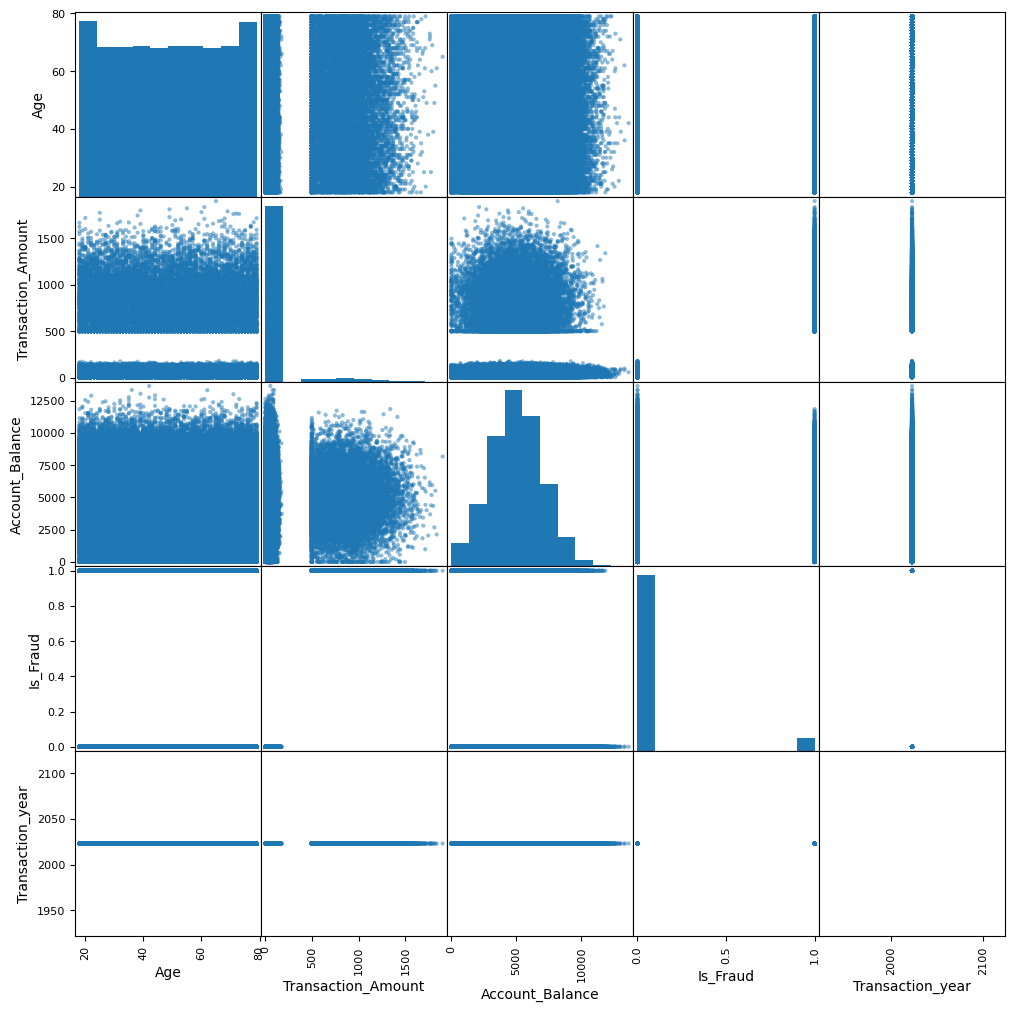

In [279]:
pd.plotting.scatter_matrix(df, figsize=(12,12))

**Observations**
1. Transaction Amount vs. Account Balance
Most transactions occur at lower amounts, with few high-value outliers.
Account balance follows a normal distribution, centered around mid-range values.

2. Age vs. Other Variables
Age distribution is uniform, except for peaks at both ends.
No clear pattern between age and transaction amount or fraud.

3. Fraudulent Transactions (Is_Fraud)
Fraud cases appear highly concentrated at specific points.
Fraud seems unrelated to age but may be linked to certain transaction behaviors.


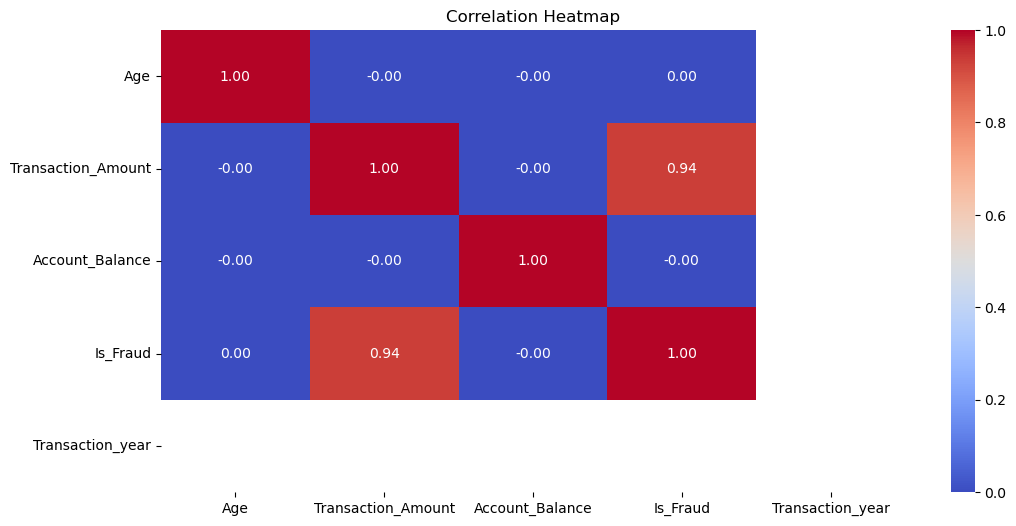

In [281]:
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations**
1. High Correlation Between Transaction_Amount and Is_Fraud (0.94)
Fraudulent transactions are strongly associated with higher transaction amounts.
Indicates that large transactions might be a key risk factor for fraud.

2. No Significant Correlation With Age or Account_Balance
Age and Account_Balance have near-zero correlations with fraud.
This suggests that fraudulent transactions occur across all age groups and account balances.

3. Transaction_Year Missing
The correlation matrix does not display Transaction_Year, possibly due to data type issues.
The column may be formatted as an object/string instead of a numerical or datetime type.

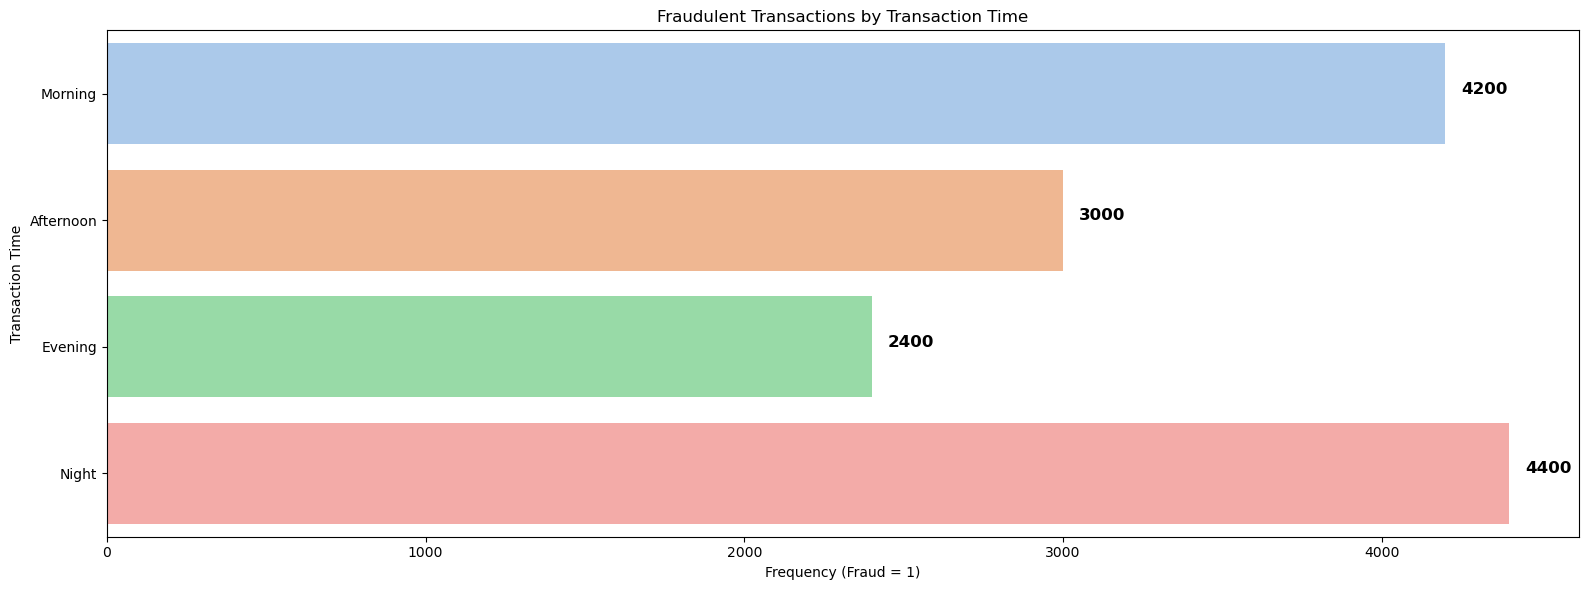

In [285]:
fraud_df = df[df['Is_Fraud'] == 1]

# Count occurrences for each transaction time category
fraud_counts = fraud_df['Transaction_Time'].value_counts().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night'], fill_value=0
)  

# Plot the data
plt.figure(figsize=(16, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend = False)
plt.xlabel("Frequency (Fraud = 1)")
plt.ylabel("Transaction Time")
plt.title("Fraudulent Transactions by Transaction Time")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


**Observations**
Most fraud occurs at Night and Morning. Higher fraud at night and early morning could indicate:
- Less oversight or weaker fraud detection during off-peak hours.
- Fraudsters exploiting late-night transaction patterns.
- Lower fraud in the evening may align with typical user behavior, reducing anomalies. 

Multivariate Analysis

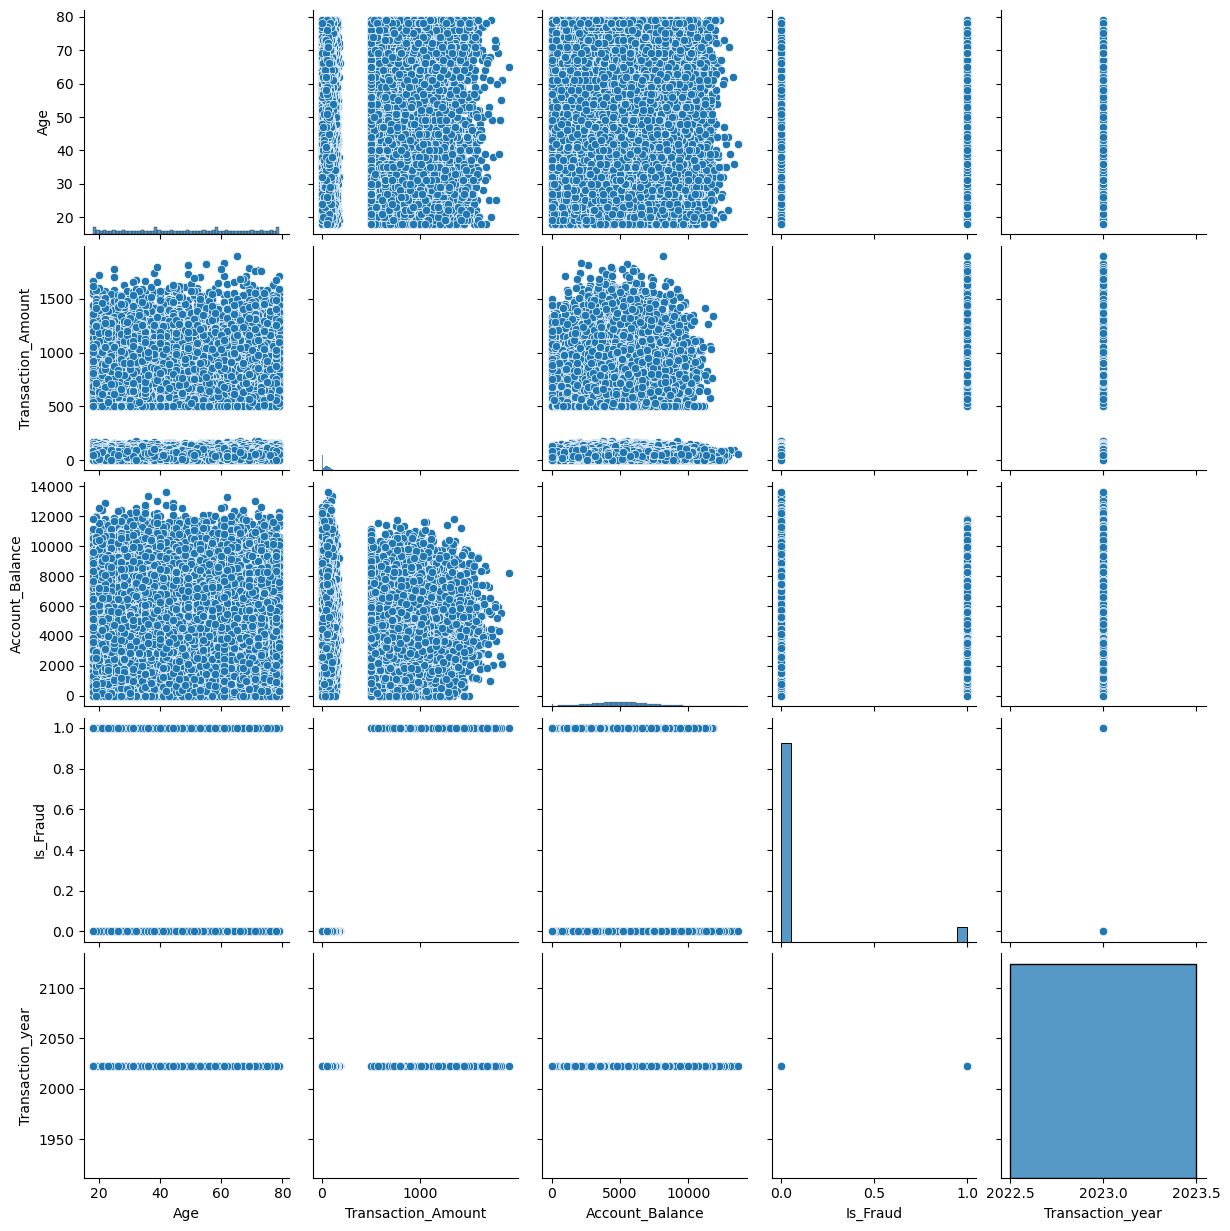

In [289]:
sns.pairplot(df)

Relationship between Target and other Variables

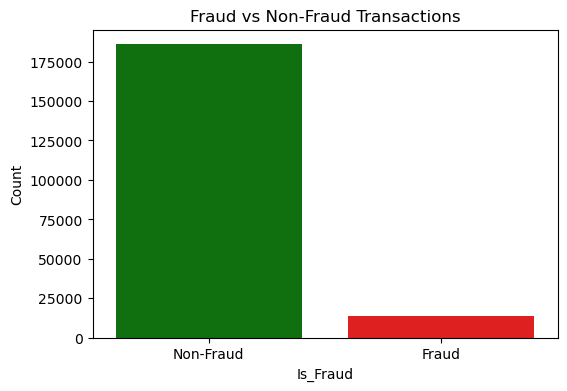

In [291]:
fraud_count = df['Is_Fraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, hue=fraud_count.index, palette=['green', 'red'], legend=False)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.ylabel("Count")
plt.show()

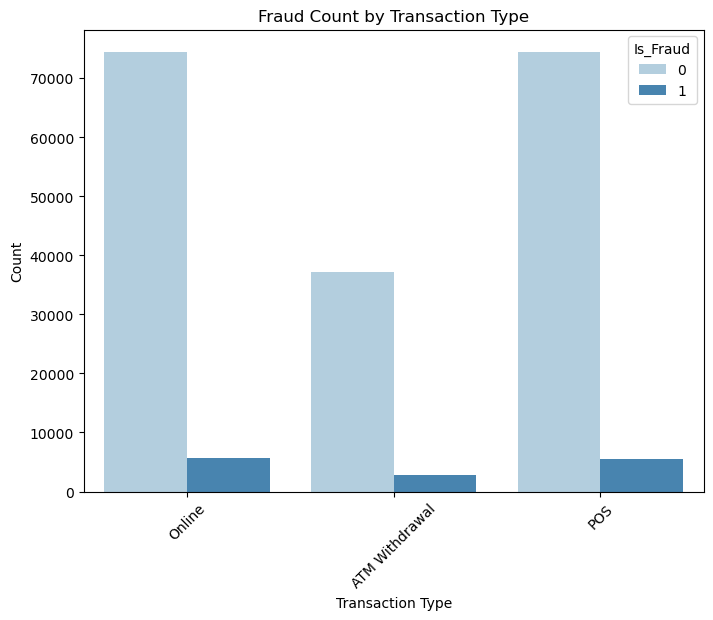

In [292]:
plt.figure(figsize=(8,6))
sns.countplot(x="Transaction_Type", hue="Is_Fraud", data=df, palette="Blues")
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations**\
Online and POS transactions have the highest fraud cases compared to ATM withdrawals.
Fraud occurs less frequently in ATM withdrawals, possibly due to stricter security measures (e.g., PIN verification, physical card presence).
Non-fraudulent transactions dominate across all transaction types, which aligns with the class imbalance in the dataset.
\
Online transactions are more vulnerable to fraud, likely due to card-not-present fraud, phishing, or compromised credentials.
POS transactions also show notable fraud cases, possibly due to stolen/cloned card usage.
ATM withdrawals are less frequently fraudulent, suggesting fraudsters prefer remote, anonymous methods over physical transactions.

Outliers

Age                      Axes(0.125,0.11;0.133621x0.77)
Transaction_Amount    Axes(0.285345,0.11;0.133621x0.77)
Account_Balance        Axes(0.44569,0.11;0.133621x0.77)
Is_Fraud              Axes(0.606034,0.11;0.133621x0.77)
Transaction_year      Axes(0.766379,0.11;0.133621x0.77)
dtype: object

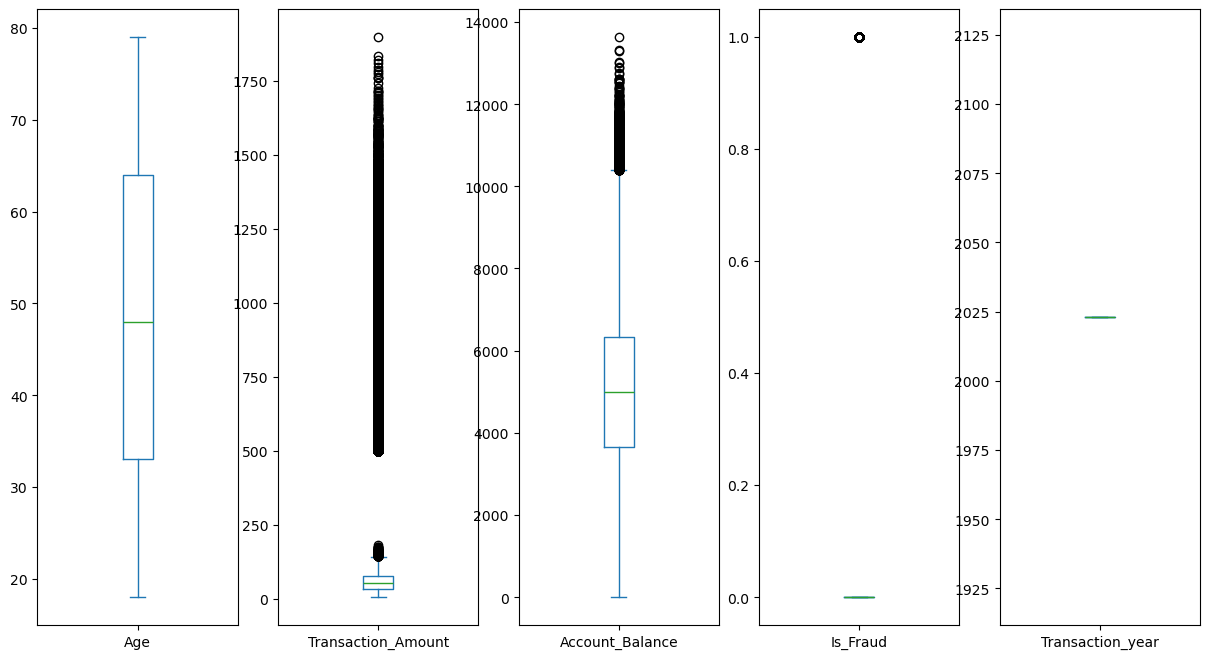

In [295]:
df.plot(kind='box', subplots=True, figsize=(15,8))

**Observations**
1. Age Distribution
The age distribution is fairly uniform, with no extreme outliers.
The median age is around 50 years, with a range from 20 to 80 years.

2. Transaction Amount
Numerous high-value outliers are present beyond the upper quartile.
Most transactions are of low value, but extreme cases reach over 1750.

3. Account Balance
The distribution is right-skewed, with a median balance of around 5000–6000.
A large number of outliers appear beyond 12,000, indicating a few users hold significantly higher balances.

4. Is_Fraud (Binary 0/1)
As expected, fraud cases are represented as 0 (non-fraud) and 1 (fraud).
The plot confirms the imbalance, with fraud cases being much fewer.

5. Transaction Year Anomaly
The Transaction Year values are unrealistic, with entries reaching beyond 2100.
This suggests a data formatting issue or incorrect parsing.

In [301]:
!pip install ydata_profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 3.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27140 sha256=2bc43bc47381eac4d9f38031f19fd6257ab1ed1c370628699562193598595af5
  Stored in directory: c:\users\yangj\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin


In [302]:
from ydata_profiling import ProfileReport

In [303]:

profile = ProfileReport(df, explorative=True)
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\yangj\Anaconda\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4 4 4 ... 4 4 4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Modelling

### Part 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from collections import defaultdict
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split


In [47]:
df = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/old_dataset1.csv") ## Load the dataset

In [3]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,23,3,Afternoon
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,11,5,Evening
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,25,5,Night
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,19,6,Afternoon
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,30,3,Evening


Load train and test sets

In [ ]:
train = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/old_processed_train_set.csv") ## Load the processed train set
test = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/old_processed_test_set.csv")  ## Load the processed test set

In [5]:
train.columns

Index(['Age', 'State', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Is_Fraud', 'Transaction_Day', 'Transaction_Weekday', 'Gender_Male',
       'Account_Type_Checking', 'Account_Type_Savings', 'Device_Type_Desktop',
       'Device_Type_Mobile', 'Device_Type_POS', 'Time_Category_Evening',
       'Time_Category_Morning', 'Time_Category_Night', 'City_target_enc',
       'Bank_Branch_target_enc', 'Transaction_Location_target_enc',
       'Transaction_Description_target_enc'],
      dtype='object')

In [ ]:
## We will get the features and target variables separeted for both train and test sets
X_train = train.drop(columns='Is_Fraud')   
y_train = train['Is_Fraud']
X_test = test.drop(columns='Is_Fraud')
y_test = test['Is_Fraud']

Apply SMOTETomek

In [ ]:
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42) 
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


In [8]:
df_resampled = pd.DataFrame(X_resampled, columns=train.columns) ## features train
df_resampled['Is_Fraud'] = y_resampled ## Target y
print(df_resampled['Is_Fraud'].value_counts())

Is_Fraud
0    139223
1     63258
Name: count, dtype: int64


Models and Performance Metrics

In [9]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, classification_report, auc
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import matplotlib.pyplot as plt

In [ ]:
## Following is a function which will be reused several times. This function includes the possible models and the evaluation metrics

def modelling(X_train, y_train, X_test,y_test):

    ## Define the models
    models  = {
        'Logistic Regression': LogisticRegression(),
        'XBGoost': xgb.XGBClassifier(random_state =42),
        'Light GBM': lgb.LGBMClassifier(class_weight='balanced', random_state= 42),
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Stacking Ensemble': StackingClassifier(
            estimators=[
                ('xgb', xgb.XGBClassifier( random_state=42)),
                ('lgb', lgb.LGBMClassifier( class_weight='balanced', random_state=42)),
            ],
            final_estimator=LogisticRegression(),
            stack_method='predict_proba')
    }

    ## Define the performance metrics
    results = []
    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Used for ROC Curve
        
        ## The binary classification problem actually contains the following performance metrics
        roc_auc = np.round(roc_auc_score(y_test, y_prob), 4)  ## ROC score
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = np.round(report["accuracy"], 4) 
        precision = np.round(report["1"]["precision"], 4) ## For classifed to Fraud
        recall = np.round(report["1"]["recall"], 4)  ## For classifed to Fraud
        
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)
        f1_score = np.round(report["1"]["f1-score"], 4)

        results.append({
            "Model": model_name,
            "ROC-AUC Score": roc_auc,
            "Accuracy": accuracy,
            "Precision (Fraud)": precision,
            "Recall (Fraud)": recall,
            "F1 Score (Fraud)": f1_score
        })

    plt.figure(figsize=(10, 5))
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Fraud Detection Models")
    plt.legend()
    plt.grid()
    plt.show()
    
    results_df = pd.DataFrame(results)
    return results_df



Train and evaluate the model


🔹 Training Logistic Regression...



c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Info] Number of positive: 63258, number of negative: 139223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1927
[LightGBM] [Info] Number of data points in the train set: 202481, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

🔹 Training KNeighbors...


🔹 Training Random Forest...


🔹 Training Stacking Ensemble...

[LightGBM] [Info] Number of positive: 63258, number of negative: 139223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Li

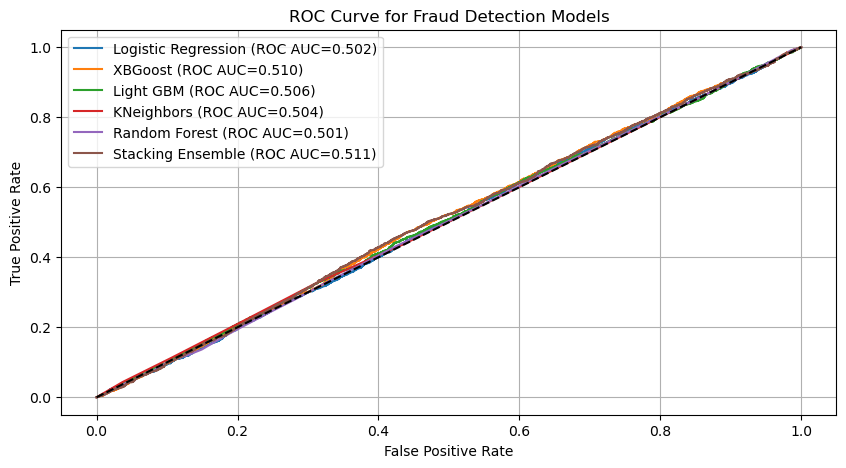

In [11]:
evaluation = modelling(X_resampled, y_resampled, X_test, y_test)

In [12]:
evaluation

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,0.5022,0.9018,0.0504,0.0530,0.0517
1,XBGoost,0.5104,0.9480,0.0294,0.0010,0.0019
2,Light GBM,0.5061,0.9495,0.0000,0.0000,0.0000
3,KNeighbors,0.5041,0.7718,0.0527,0.2076,0.0841
4,Random Forest,0.5009,0.9436,0.0458,0.0059,0.0105
5,Stacking Ensemble,0.5105,0.9468,0.0333,0.0020,0.0037


**Summary:**  
*In the previous step, I applied SMOTETomek to the training set to address the issue of imbalanced classes. However, despite this preprocessing, the final train-test split remained imbalanced. I then selected several machine learning models, including Logistic Regression and KNN, along with ensemble algorithms such as Random Forest, LightGBM, and XGBoost. Additionally, I implemented ensemble learning using Stacking to train and evaluate the models.*  

*The evaluation metrics used are the ROC-AUC score, accuracy score, and classification report. However, given the rarity of fraud cases in the dataset, accuracy is not an ideal metric as it can be misleading. The ROC-AUC score is a more suitable metric for binary classification. Upon analyzing the scores across all models, it is evident that they are all close to 0.50, with Stacking and XGBoost slightly higher at around 0.51. This suggests that these models perform no better than random guessing. Similarly, the recall values are too low to be considered reliable indicators. The ROC-AUC curve further confirms this pattern, highlighting the models' poor performance in distinguishing fraudulent cases.*

In [51]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_resampled,y_resampled)
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Convert to a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_resampled.columns,
    "Importance": feature_importances
})

# Sort by importance (highest to lowest)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


In [14]:
feature_importance_df

,Feature,Importance
1,State,0.057596
2,Transaction_Amount,0.055088
17,Time_Category_Night,0.054687
5,Account_Balance,0.054538
16,Time_Category_Morning,0.053459
10,Account_Type_Checking,0.047989
21,Transaction_Description_target_enc,0.047784
3,Transaction_Type,0.046036
0,Age,0.045724
7,Transaction_Day,0.044518


In [15]:
## Select features with greater than 0.04 importance
threshold = 0.04
selected_features = feature_importance_df[feature_importance_df["Importance"] > threshold]["Feature"].tolist()

In [16]:
## Refine x_resample and x_test
X_resampled_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]


🔹 Training Logistic Regression...



c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Info] Number of positive: 63258, number of negative: 139223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 202481, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Training KNeighbors...


🔹 Training Random Forest...


🔹 Training Stacking Ensemble...

[LightGBM] [Info] Number of positive: 63258, number of negative: 139223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 202481, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 50606, number of negative: 111378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] N

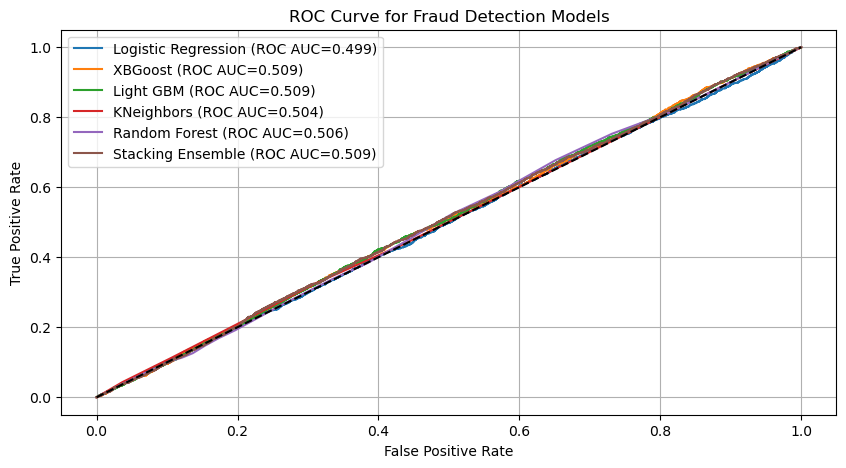

In [ ]:
## Use selected features to train the model again
results_selected = modelling(X_resampled_selected,y_resampled, X_test_selected, y_test)

In [18]:
results_selected

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,0.4992,0.8834,0.0512,0.0748,0.0608
1,XBGoost,0.5087,0.9495,0.0000,0.0000,0.0000
2,Light GBM,0.5090,0.9496,0.0000,0.0000,0.0000
3,KNeighbors,0.5041,0.7718,0.0527,0.2076,0.0841
4,Random Forest,0.5062,0.9472,0.0208,0.0010,0.0019
5,Stacking Ensemble,0.5093,0.9495,0.0000,0.0000,0.0000


**Summary:**  
*One potential way to enhance model performance is through feature selection using Random Forest. By leveraging the feature importance scores from a Random Forest model, we can identify the  relevant variables that contribute to fraud detection. Eliminating less important or redundant features may help reduce noise and improve model generalization. Additionally, focusing on key features could enhance interpretability and allow models to better distinguish between fraudulent and non-fraudulent transactions.*

*The evaluation results persist to indicate that all models perform poorly in detecting fraud cases. All ROC-AUC scores decline and are close to 0.50, suggesting that the models are no better than random guessing. While accuracy appears high, it is misleading due to the extreme class imbalance. The recall scores for fraud detection are particularly low, with some models, such as XGBoost, LightGBM, and the Stacking Ensemble, failing to detect any fraud cases at all. The ROC curve further confirms this, as the models' performance follows a near-random classification pattern. These results highlight the challenges of fraud detection.*


Feature Engineering

In [46]:
data = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/Bank_Transaction_Fraud_Detection.csv")

In [20]:
df_copy = train
df_copy2 = test

**Ratio-Based Behaviorial Feature Engineering:**  
* This indicator shows how a transaction compares to a user's historical spending behavior because fraudsters often make transactions much larger than the customer’s usual spending pattern.*

In [ ]:
## Apply to both  sets using the same algorithm
df_copy["amount_to_avg_ratio"] = data["Transaction_Amount"] / data.groupby("Customer_ID")["Transaction_Amount"].transform("mean")
df_copy2["amount_to_avg_ratio"] = data["Transaction_Amount"] / data.groupby("Customer_ID")["Transaction_Amount"].transform("mean")

**Behavioral Feature Engineering (transactions_per_day) and Aggregated Statistical Features (unique_merchants):**  
* transactions_per_day can help us identify fraudulent bulk transactions in the dataset.
* unique_merhants can be a signal to fraudster testing a stolen card at multiple stores.

In [ ]:
df_copy["transactions_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_ID"].transform("count")
df_copy["unique_merchants"] = data.groupby("Customer_ID")["Merchant_ID"].transform("nunique")
df_copy2["transactions_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_ID"].transform("count")
df_copy2["unique_merchants"] = data.groupby("Customer_ID")["Merchant_ID"].transform("nunique")

**Behavioral Feature Engineering (average_spending_per_day) and Anomaly Detection Features (spending_change):**  
* average_spending_per_day helps us to observe the daily spending and fradsters tend to make large amount of spendings or withdraws.
* spending_change is used to compare an individual transaction amount to the user's daily average spending. Thus, high values mean the transaction is much larger than usual, which could indicate fraud

In [ ]:
df_copy["average_spending_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_Amount"].transform("mean")
df_copy["spending_change"] = df_copy["Transaction_Amount"] / df_copy["average_spending_per_day"]
df_copy2["average_spending_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_Amount"].transform("mean")
df_copy2["spending_change"] = df_copy["Transaction_Amount"] / df_copy["average_spending_per_day"]

In [24]:
df_copy2.head()

,Age,State,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Is_Fraud,Transaction_Day,Transaction_Weekday,...,Time_Category_Night,City_target_enc,Bank_Branch_target_enc,Transaction_Location_target_enc,Transaction_Description_target_enc,amount_to_avg_ratio,transactions_per_day,unique_merchants,average_spending_per_day,spending_change
0,49,0.029031,95015.64,2,0,8579.75,5,0,7,1,...,True,0.042530,0.042530,0.042530,0.047725,1.0,1,1,32415.45,1.422045
1,21,0.029600,59784.62,2,0,65738.54,17,0,16,3,...,False,0.036105,0.036105,0.036105,0.055188,1.0,1,1,43622.60,0.163414
2,26,0.029806,82561.18,4,1,9857.93,1,0,23,3,...,False,0.037152,0.037152,0.037152,0.054466,1.0,1,1,63062.56,0.040088
3,25,0.029700,91900.63,2,4,58082.67,12,0,12,6,...,True,0.050861,0.050861,0.050861,0.057359,1.0,1,1,14000.72,2.748866
4,43,0.029425,36058.15,1,2,33791.81,9,0,11,5,...,True,0.058453,0.058453,0.058453,0.047967,1.0,1,1,18335.16,4.844718


Train and evaluate the models again

In [25]:
X_train = df_copy.drop(columns='Is_Fraud')
y_train = df_copy['Is_Fraud']
X_test = df_copy2.drop(columns='Is_Fraud')
y_test = df_copy2['Is_Fraud']

In [26]:
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
df_resampled = pd.DataFrame(X_resampled, columns=df_copy.columns) ## features df_copy
df_resampled['Is_Fraud'] = y_resampled ## Target y
print(df_resampled['Is_Fraud'].value_counts())

Is_Fraud
0    145933
1     69968
Name: count, dtype: int64


In [27]:
def modelling(X_train, y_train, X_test,y_test):

    ## Define the models
    models  = {
        'Logistic Regression': LogisticRegression(),
        'XBGoost': xgb.XGBClassifier(random_state =42),
        'Light GBM': lgb.LGBMClassifier(class_weight='balanced', random_state= 42),
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Stacking Ensemble': StackingClassifier(
            estimators=[
                ('xgb', xgb.XGBClassifier( random_state=42)),
                ('lgb', lgb.LGBMClassifier( class_weight='balanced', random_state=42)),
            ],
            final_estimator=LogisticRegression(),
            stack_method='predict_proba')
    }

    ## Define the performance metrics
    results = []
    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Used for ROC Curve
        
        ## The binary classification problem actually contains the following performance metrics
        roc_auc = np.round(roc_auc_score(y_test, y_prob), 4)  ## ROC score
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = np.round(report["accuracy"], 4) 
        precision = np.round(report["1"]["precision"], 4) ## For classifed to Fraud
        recall = np.round(report["1"]["recall"], 4)  ## For classifed to Fraud
        
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)
        f1_score = np.round(report["1"]["f1-score"], 4)

        results.append({
            "Model": model_name,
            "ROC-AUC Score": roc_auc,
            "Accuracy": accuracy,
            "Precision (Fraud)": precision,
            "Recall (Fraud)": recall,
            "F1 Score (Fraud)": f1_score
        })

    plt.figure(figsize=(10, 5))
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Fraud Detection Models")
    plt.legend()
    plt.grid()
    plt.show()
    
    results_df = pd.DataFrame(results)
    return results_df




🔹 Training Logistic Regression...



c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi


🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Info] Number of positive: 69968, number of negative: 145933
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 215901, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Training KNeighbors...


🔹 Training Random Forest...


🔹 Training Stacking Ensemble...

[LightGBM] [Info] Number of positive: 69968, number of negative: 145933
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 215901, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 55974, number of negative: 116746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] N

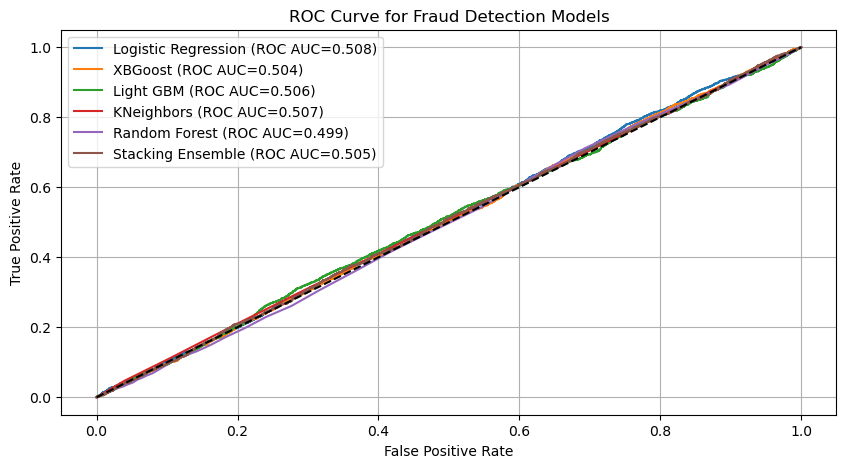

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,0.5083,0.9496,0.0000,0.0000,0.0000
1,XBGoost,0.5038,0.9486,0.0000,0.0000,0.0000
2,Light GBM,0.5062,0.9496,0.0000,0.0000,0.0000
3,KNeighbors,0.5067,0.7806,0.0530,0.1987,0.0837
4,Random Forest,0.4988,0.9454,0.0444,0.0040,0.0073
5,Stacking Ensemble,0.5046,0.9479,0.0149,0.0005,0.0010


In [28]:
modelling(X_resampled, y_resampled, X_test, y_test)

**Summary:**  
*The previous results emphasize the challenges of fraud detection and highlight the need for improved techniques, such as feature engineering.*  

*The current evaluation results are consistent with the previous findings, showing no significant improvement in model performance. All models continue to struggle with fraud detection, as evidenced by ROC-AUC scores close to 0.50, indicating performance similar to random guessing. While most models achieve high accuracy, this metric is misleading due to the extreme class imbalance. The recall scores for fraud detection remain particularly low, with Logistic Regression, XGBoost, LightGBM, and Stacking Ensemble failing to identify any fraudulent cases (recall = 0.000). K-Nearest Neighbors demonstrates the highest recall (0.1987), but its overall effectiveness remains poor. The ROC curve further confirms these findings, illustrating the models' lack of discriminatory power.*  

In [29]:
from sklearn.metrics import precision_recall_curve

## We will switch the X_resample and y_resample  to the original ones using the train and test sets
model = xgb.XGBClassifier(random_state =42)
model.fit(X_resampled, y_resampled)
y_probs = model.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
optimal_threshold = thresholds[recall.argmax()]  # Choose threshold maximizing recall

y_pred_adjusted = (y_probs > optimal_threshold).astype(int)


In [30]:
roc_auc = roc_auc_score(y_test, y_probs)

# Print Performance Metrics
print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print("🔹 Confusion Matrix:\n", conf_matrix)


🔹 ROC-AUC Score: 0.5038
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     37982
           1       0.05      1.00      0.10      2018

    accuracy                           0.05     40000
   macro avg       0.53      0.50      0.05     40000
weighted avg       0.95      0.05      0.00     40000

🔹 Confusion Matrix:
 [[    1 37981]
 [    0  2018]]


*Thus, from the previous evaluations, overall speaking, the XGBoost model has a better performance and so we will use it and save it.*

Save the model and the notebook to github.

In [32]:
xgb_model = xgb.XGBClassifier(random_state =42)


In [33]:
import pickle
with open("old_xgb_fraud_model.pkl","wb") as f:
    pickle.dump(xgb_model, f)


In [55]:
import pickle
with open("lightgbm_fraud_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

Autoencoder

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [39]:
# Define features and target
X = df.drop(columns=["Is_Fraud"])  # Features
y = df["Is_Fraud"]  # Target variable

In [40]:
## Find the categorical columns
categorical_cols = ['Gender', 'Account_Type', 'Device_Type', 'Time_Category', 'Transaction_Type',
                    'Merchant_Category', 'Transaction_Device', 'State', 'City', 'Bank_Branch',
                    'Transaction_Location', 'Transaction_Description']

## Combine different encoding strategies
one_hot_cols = ['Gender', 'Account_Type', 'Transaction_Type']  
label_cols = ['Time_Category']  
freq_cols = ['Device_Type', 'Transaction_Device', 'State', 'City', 'Bank_Branch'] 
target_cols = ['Merchant_Category', 'Transaction_Location', 'Transaction_Description']  

## Apply encoding
X = pd.get_dummies(X, columns=one_hot_cols, drop_first=True)

le = LabelEncoder()
for col in label_cols:
    X[col] = le.fit_transform(X[col])

freq_map = {col: X[col].value_counts().to_dict() for col in freq_cols}
for col in freq_cols:
    X[col] = X[col].map(freq_map[col])

te = TargetEncoder()
X[target_cols] = te.fit_transform(X[target_cols], y)

In [41]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train-test (Train on Normal Transactions Only)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Select only Non-Fraud transactions for Autoencoder Training
X_train_normal = X_train[y_train == 0]  

In [42]:
input_dim = X_train_normal.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
encoded = Dense(4, activation="relu")(encoded)

decoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded) 

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse") 

In [43]:
autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.9097 - val_loss: 0.7842
Epoch 2/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7789 - val_loss: 0.7673
Epoch 3/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7673 - val_loss: 0.7612
Epoch 4/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7639 - val_loss: 0.7548
Epoch 5/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7570 - val_loss: 0.7532
Epoch 6/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7563 - val_loss: 0.7525
Epoch 7/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7547 - val_loss: 0.7514
Epoch 8/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7544 - val_loss: 0.7515
Epoch 9/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7544 - val_loss: 0.7510
Epoch 10/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7542 - val_loss: 0.7507
Epoch 11/50
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7534 - val_loss: 0.7514
Epoch 12/50
4274/4274 ━━━━━━━━

In [44]:
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.abs(X_test - X_test_reconstructed), axis=1)

threshold = np.percentile(reconstruction_errors, 95)

y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step


In [45]:
roc_auc = roc_auc_score(y_test, y_pred_autoencoder)
print(f"🔹 ROC AUC Score: {roc_auc:.4f}")

print("🔹 Classification Report:\n", classification_report(y_test, y_pred_autoencoder))

🔹 ROC AUC Score: 0.4989
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     37955
           1       0.05      0.05      0.05      2045

    accuracy                           0.90     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.90      0.90     40000



**Summary:**  
*The final approach we explore is an unsupervised learning method: Autoencoder. Autoencoders are commonly used for fraud detection due to their ability to identify anomalies in highly imbalanced datasets. By learning normal transaction patterns, they can detect fraudulent activities based on reconstruction errors, making them particularly useful when fraudulent cases are rare. Their unsupervised nature allows them to function without labeled data, making them effective in identifying new fraud patterns as they emerge.*  

*Unfortunately, the results are consistent with previous evaluations using supervised learning models, and in some cases, even worse. This suggests that fraudulent and non-fraudulent transactions may share too many similarities, preventing the autoencoder from effectively distinguishing between them. As a result, the model struggles to learn meaningful representations, leading to misclassification of fraudulent transactions as non-fraudulent.*

## Conclusion:  
**Model Performance and Reasons:**  
* The relevant metrics are ROC-AUC score and recall values. Accuracy is a crucial indicator in classification but in this project, accuracy is misleading because the rate of non-fraud is much higher than fraud. 
* While we look at the precision and recall for detecting fraud transactions, we can observe that they are very low. These indicates that the models have very poor ability in classifying fraud transactions but detecting non-fraud extremely well instead. This suggests that a bias to the non-fraud class reduces the usefulnes in cases where detecting fraud transactions is the key task.
* The problem might be the imbalanced class. As the fraud transactions are extremely rare in the datasets, and even though SMOTE-Tomek is applied to try to balance them, the effects and results  are still not ideal. 
* Feature Overlap Between Fraudulent and Non-Fraudulent Transactions in the dataset. When fraudulent transactions closely resemble legitimate ones, models may fail to identify clear patterns, leading to misclassification of fraud as normal transactions.  
* Lack of Distinctive Features to differeantiate fraud and non-fraud classes. (i.e., If the dataset lacks strong differentiating factors between fraud and non-fraud transactions, the models will struggle to detect fraudulent behavior effectively. ) 

**Solution:**  
* Tuning hyperparameters using techniques like Grid Search or Bayesian Optimization can help models generalize better to fraudulent cases.

Clustering: Customer Segmentation

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ["Age", "Transaction_Amount", "Account_Balance"]
categorical_features = ["Gender", "Account_Type", "Merchant_Category", "Device_Type"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

gmm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("gmm", GaussianMixture(n_components=4, random_state=42))
])

df["Cluster"] = gmm_pipeline.fit_predict(df)

df["Cluster"].value_counts()


Cluster
1    50756
0    50058
3    49936
2    49250
Name: count, dtype: int64

In [49]:
cluster_summary = df.groupby("Cluster")[["Age", "Transaction_Amount", "Account_Balance"]].mean()
print(cluster_summary)


               Age  Transaction_Amount  Account_Balance
Cluster                                                
0        57.825762        49365.427835     29160.809252
1        30.441741        49828.654832     29176.195531
2        44.012467        75318.190661     76087.218103
3        43.969581        23989.595274     76091.466983


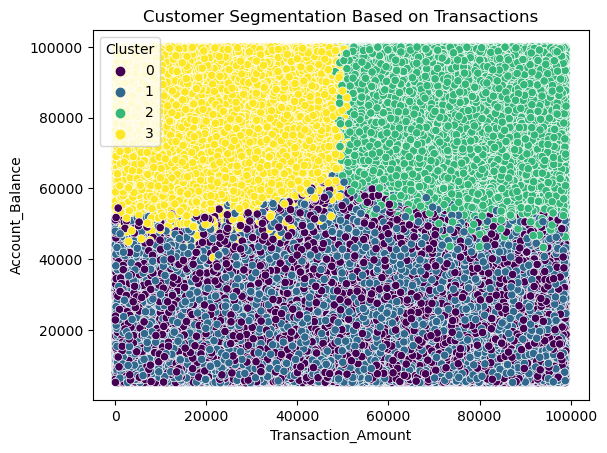

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="Transaction_Amount", y="Account_Balance", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Based on Transactions")
plt.show()


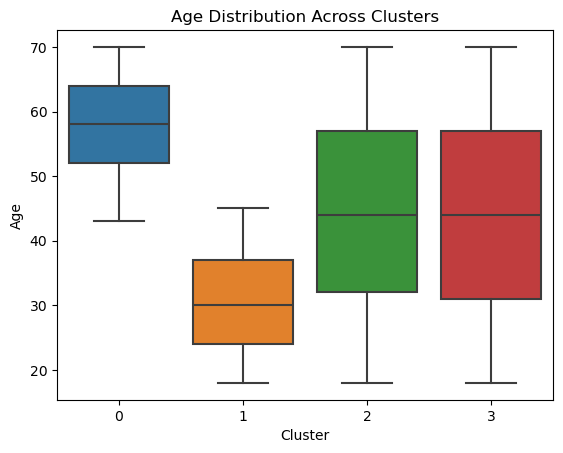

In [37]:
sns.boxplot(data=df, x="Cluster", y="Age")
plt.title("Age Distribution Across Clusters")
plt.show()


## Conclusion for clustering:  
**Methods Employed:**  
*Gausian Mixture Model: From the autoencoder results, we suspect that there are too many similarities between fraud and non-fraud transactions. This indicates that there will be a plenty of overlaping behaviors. In this case, GMM is very useful as it is a Probability-Based Segmentation method.*  

**Results:**
*GMM clusters the data into for clusters. They are listed below:*  
* Cluster 0: older customers,moderate transaction amounts, and low account balances
* Cluster 1：youngest group,similar transaction amounts, low account balances
* Cluster 2: middle-aged customers, high-value transactions, high account balances
* Cluster 3: middle-aged group, low transaction amounts,  high account balances  

*From the scatter plot, we observe that cluster 2 and 3 has wealthier customers indicated by high account balances and cluster 0 and 1 on the other hand. Boxplot helps us to ocnfirm that age variations in each group.*

**Business Campaigns:**  
* Cluster 0: Encourage financial security for retirees with retirement savings plans, fixed-income investments, tailored insurance options, and personalized financial advisory services to optimize their savings.
* Cluster 1: Attract young professionals and students with low-fee banking products, cashback rewards, and financial literacy programs like budgeting workshops to foster long-term loyalty.
* Cluster 2&3: To retain high-net-worth customers, businesses can offer exclusive wealth management, priority services, premium credit cards, and concierge support. Additionally, high-interest savings accounts and VIP loyalty programs can enhance engagement and loyalty.
* Cluster 3: Boost customer spending with special promotions, tiered interest rates, and exclusive partnerships with luxury brands and lifestyle services to enhance rewards and incentives.


### Part 2

**Since the previous dataset performed poorly in fraud detection, our teammate attempted to improve the results by tuning the parameters of the XGBoost model. However, the adjustments did not yield significant improvements. Upon rechecking the dataset, he confirmed my earlier suspicion from a previous code version: the similarities between fraudulent and non-fraudulent transactions are too strong, making it difficult for the models to differentiate between them. To address this issue, an updated dataset has been provided by the teammate, who verified the problem. After the data is preproceesed again by abother group member, I will now apply the same methodologies for training and evaluation, with a final conclusion presented at the end of the process.**

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from collections import defaultdict
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split


In [8]:
df = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/new_dataset.csv")

In [9]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,25,CA,Los Angeles,Branch B,Checking,102.690676,Online,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,Gift,1,1,6,Night
1,Female,58,FL,New York,Branch C,Savings,83.034624,ATM Withdrawal,Luxury,7833.088780,Web,TX,Android,0,USD,Payment,1,1,6,Night
2,Female,71,PA,Dallas,Branch A,Savings,51.521278,ATM Withdrawal,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,Subscription,1,1,6,Night
3,Female,27,NY,Chicago,Branch A,Savings,74.897156,ATM Withdrawal,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,Subscription,1,1,6,Night
4,Male,28,OH,Philadelphia,Branch B,Savings,5.000000,Online,Electronics,4877.511195,Web,PA,Linux,0,CAD,Gift,1,1,6,Night


## Load train and test sets

In [2]:
train = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/processed_train_set.csv")
test = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/project final/processed_test_set.csv")

In [3]:
train.columns

Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal',
       'Is_Fraud'],
      dtype='object')

In [4]:
X_train = train.drop(columns='Is_Fraud')
y_train = train['Is_Fraud']
X_test = test.drop(columns='Is_Fraud')
y_test = test['Is_Fraud']

## Apply SMOTETomek

In [5]:
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


In [6]:
df_resampled = pd.DataFrame(X_resampled, columns=train.columns) ## features train
df_resampled['Is_Fraud'] = y_resampled ## Target y
print(df_resampled['Is_Fraud'].value_counts())


Is_Fraud
0    148800
1     74400
Name: count, dtype: int64


## Models and Performance Metrics

In [7]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, classification_report, auc
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import matplotlib.pyplot as plt

In [8]:
def modelling(X_train, y_train, X_test,y_test):

    ## Define the models
    models  = {
        'Logistic Regression': LogisticRegression(),
        'XBGoost': xgb.XGBClassifier(random_state =42),
        'Light GBM': lgb.LGBMClassifier(class_weight='balanced', random_state= 42),
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Stacking Ensemble': StackingClassifier(
            estimators=[
                ('xgb', xgb.XGBClassifier( random_state=42)),
                ('lgb', lgb.LGBMClassifier( class_weight='balanced', random_state=42)),
            ],
            final_estimator=LogisticRegression(),
            stack_method='predict_proba')
    }

    ## Define the performance metrics
    results = []
    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Used for ROC Curve
        
        ## The binary classification problem actually contains the following performance metrics
        roc_auc = np.round(roc_auc_score(y_test, y_prob), 4)  ## ROC score
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = np.round(report["accuracy"], 4) 
        precision = np.round(report["1"]["precision"], 4) ## For classifed to Fraud
        recall = np.round(report["1"]["recall"], 4)  ## For classifed to Fraud
        
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)
        f1_score = np.round(report["1"]["f1-score"], 4)

        results.append({
            "Model": model_name,
            "ROC-AUC Score": roc_auc,
            "Accuracy": accuracy,
            "Precision (Fraud)": precision,
            "Recall (Fraud)": recall,
            "F1 Score (Fraud)": f1_score
        })

    plt.figure(figsize=(10, 5))
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Fraud Detection Models")
    plt.legend()
    plt.grid()
    plt.show()
    
    results_df = pd.DataFrame(results)
    return results_df



## Train and evaluate the model


🔹 Training Logistic Regression...


🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 74400, number of negative: 148800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 223200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

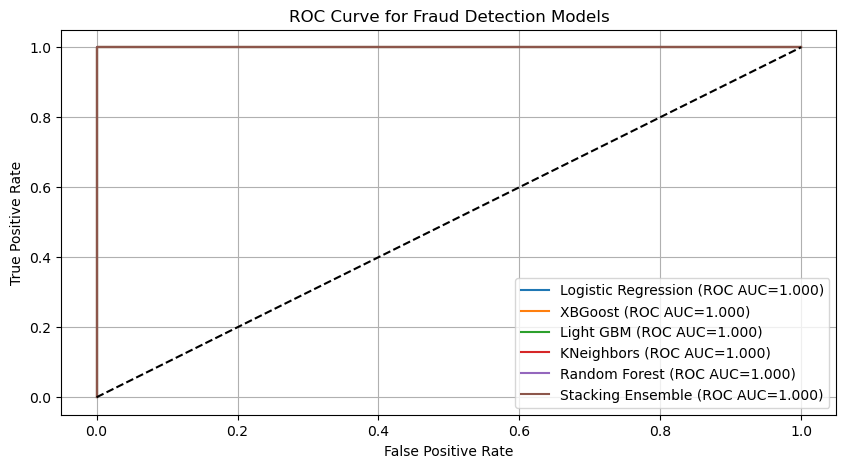

In [9]:
evaluation = modelling(X_resampled, y_resampled, X_test, y_test)

In [10]:
evaluation

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,XBGoost,1.0,1.0,1.0,1.0,1.0
2,Light GBM,1.0,1.0,1.0,1.0,1.0
3,KNeighbors,1.0,1.0,1.0,1.0,1.0
4,Random Forest,1.0,1.0,1.0,1.0,1.0
5,Stacking Ensemble,1.0,1.0,1.0,1.0,1.0


In [11]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_resampled,y_resampled)
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Convert to a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_resampled.columns,
    "Importance": feature_importances
})

# Sort by importance (highest to lowest)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


In [12]:
feature_importance_df

,Feature,Importance
0,Transaction_Amount,0.411554
4,Transaction_Month,0.307457
1,Merchant_Category,0.119798
5,Transaction_Day,0.094211
2,Transaction_Location,0.036776
6,Transaction_Device_Mobile,0.014818
7,Transaction_Device_POS Terminal,0.011599
3,Device_Type,0.003788


In [13]:
## Select features with greater than 0.04 importance
threshold = 0.003
selected_features = feature_importance_df[feature_importance_df["Importance"] > threshold]["Feature"].tolist()

In [14]:
## Refine x_resample and x_test
X_resampled_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]


🔹 Training Logistic Regression...


🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 74400, number of negative: 148800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 223200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

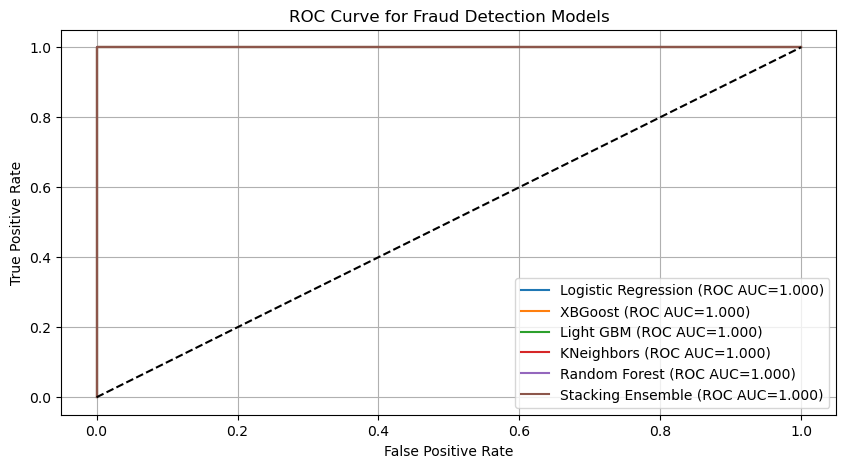

In [15]:
## Use selected features to train the model
results_selected = modelling(X_resampled_selected,y_resampled, X_test_selected, y_test)

In [33]:
results_selected

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,XBGoost,1.0,1.0,1.0,1.0,1.0
2,Light GBM,1.0,1.0,1.0,1.0,1.0
3,KNeighbors,1.0,1.0,1.0,1.0,1.0
4,Random Forest,1.0,1.0,1.0,1.0,1.0
5,Stacking Ensemble,1.0,1.0,1.0,1.0,1.0


## Feature Engineering

In [16]:
data = pd.read_csv("C:/Users/zhao2/OneDrive/Desktop/MMA Courses/INSY 695/Bank_Transaction_Fraud_Detection.csv")

In [17]:
df_copy = train
df_copy2 = test

In [ ]:
df_copy["amount_to_avg_ratio"] = data["Transaction_Amount"] / data.groupby("Customer_ID")["Transaction_Amount"].transform("mean")
df_copy2["amount_to_avg_ratio"] = data["Transaction_Amount"] / data.groupby("Customer_ID")["Transaction_Amount"].transform("mean")

In [ ]:
df_copy["transactions_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_ID"].transform("count")
df_copy["unique_merchants"] = data.groupby("Customer_ID")["Merchant_ID"].transform("nunique")
df_copy2["transactions_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_ID"].transform("count")
df_copy2["unique_merchants"] = data.groupby("Customer_ID")["Merchant_ID"].transform("nunique")

In [ ]:
df_copy["average_spending_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_Amount"].transform("mean")
df_copy["spending_change"] = df_copy["Transaction_Amount"] / df_copy["average_spending_per_day"]
df_copy2["average_spending_per_day"] = data.groupby(["Customer_ID", "Transaction_Date"])["Transaction_Amount"].transform("mean")
df_copy2["spending_change"] = df_copy["Transaction_Amount"] / df_copy["average_spending_per_day"]

In [21]:
df_copy2.head()

,Transaction_Amount,Merchant_Category,Transaction_Location,Device_Type,Transaction_Month,Transaction_Day,Transaction_Device_Mobile,Transaction_Device_POS Terminal,Is_Fraud,amount_to_avg_ratio,transactions_per_day,unique_merchants,average_spending_per_day,spending_change
0,3.998162,4,1,3,3,22,False,False,0,1.0,1,1,32415.45,0.000136
1,4.222577,5,1,1,3,30,False,False,0,1.0,1,1,43622.60,0.000099
2,4.412526,4,4,2,5,1,False,True,0,1.0,1,1,63062.56,0.000069
3,4.193827,3,0,1,3,1,False,False,0,1.0,1,1,14000.72,0.000450
4,3.472688,3,4,0,5,3,False,False,0,1.0,1,1,18335.16,0.000239


## Train and evaluate the models again

In [22]:
X_train = df_copy.drop(columns='Is_Fraud')
y_train = df_copy['Is_Fraud']
X_test = df_copy2.drop(columns='Is_Fraud')
y_test = df_copy2['Is_Fraud']

In [23]:
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
df_resampled = pd.DataFrame(X_resampled, columns=df_copy.columns) ## features df_copy
df_resampled['Is_Fraud'] = y_resampled ## Target y
print(df_resampled['Is_Fraud'].value_counts())

Is_Fraud
0    148291
1     73891
Name: count, dtype: int64


In [25]:
def modelling(X_train, y_train, X_test,y_test):

    ## Define the models
    models  = {
        'Logistic Regression': LogisticRegression(),
        'XBGoost': xgb.XGBClassifier(random_state =42),
        'Light GBM': lgb.LGBMClassifier(class_weight='balanced', random_state= 42),
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Stacking Ensemble': StackingClassifier(
            estimators=[
                ('xgb', xgb.XGBClassifier( random_state=42)),
                ('lgb', lgb.LGBMClassifier( class_weight='balanced', random_state=42)),
            ],
            final_estimator=LogisticRegression(),
            stack_method='predict_proba')
    }

    ## Define the performance metrics
    results = []
    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Used for ROC Curve
        
        ## The binary classification problem actually contains the following performance metrics
        roc_auc = np.round(roc_auc_score(y_test, y_prob), 4)  ## ROC score
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = np.round(report["accuracy"], 4) 
        precision = np.round(report["1"]["precision"], 4) ## For classifed to Fraud
        recall = np.round(report["1"]["recall"], 4)  ## For classifed to Fraud
        
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)
        f1_score = np.round(report["1"]["f1-score"], 4)

        results.append({
            "Model": model_name,
            "ROC-AUC Score": roc_auc,
            "Accuracy": accuracy,
            "Precision (Fraud)": precision,
            "Recall (Fraud)": recall,
            "F1 Score (Fraud)": f1_score
        })

    plt.figure(figsize=(10, 5))
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Fraud Detection Models")
    plt.legend()
    plt.grid()
    plt.show()
    
    results_df = pd.DataFrame(results)
    return results_df




🔹 Training Logistic Regression...



c:\Users\zhao2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Training XBGoost...


🔹 Training Light GBM...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73891, number of negative: 148291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 222182, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

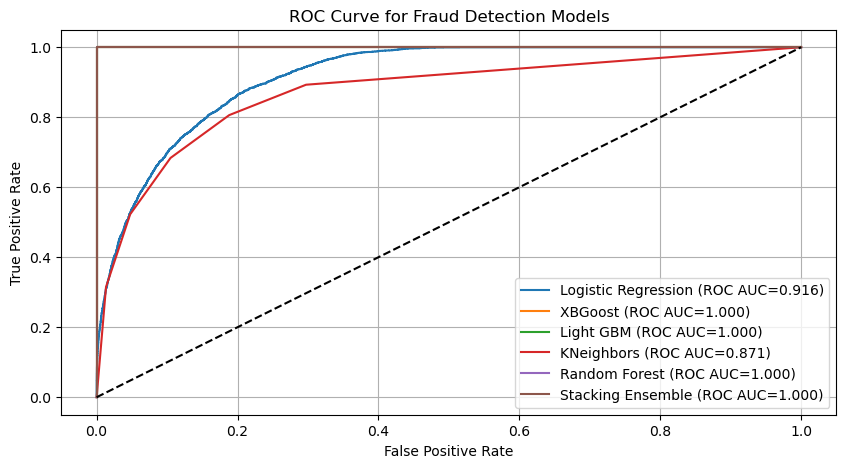

,Model,ROC-AUC Score,Accuracy,Precision (Fraud),Recall (Fraud),F1 Score (Fraud)
0,Logistic Regression,0.9163,0.8605,0.3022,0.7582,0.4321
1,XBGoost,1.0000,1.0000,1.0000,1.0000,1.0000
2,Light GBM,1.0000,1.0000,1.0000,1.0000,1.0000
3,KNeighbors,0.8708,0.8804,0.3293,0.6836,0.4444
4,Random Forest,1.0000,1.0000,1.0000,1.0000,1.0000
5,Stacking Ensemble,1.0000,1.0000,1.0000,1.0000,1.0000


In [26]:
modelling(X_resampled, y_resampled, X_test, y_test)

In [27]:
from sklearn.metrics import precision_recall_curve

## We will switch the X_resample and y_resample  to the original ones using the train and test sets
model = xgb.XGBClassifier(random_state =42)
model.fit(X_resampled, y_resampled)
y_probs = model.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
optimal_threshold = thresholds[recall.argmax()]  # Choose threshold maximizing recall

y_pred_adjusted = (y_probs > optimal_threshold).astype(int)


In [28]:
roc_auc = roc_auc_score(y_test, y_probs)

# Print Performance Metrics
print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print("🔹 Confusion Matrix:\n", conf_matrix)


🔹 ROC-AUC Score: 1.0000
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37200
           1       1.00      1.00      1.00      2800

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

🔹 Confusion Matrix:
 [[37200     0]
 [    0  2800]]


## Save the model and the notebook to github.

In [29]:
xgb_model = xgb.XGBClassifier(random_state =42)


In [31]:
import pickle
with open("xgb_fraud_model.pkl","wb") as f:
    pickle.dump(xgb_model, f)


In [55]:
import pickle
with open("lightgbm_fraud_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

##  Conclusion:  
* The initial evaluation of six machine learning models—Logistic Regression, XGBoost, LightGBM, K-Nearest Neighbors (KNN), Random Forest, and a Stacking Ensemble—yielded perfect results. All models achieved an ROC-AUC score of 1.0, along with 100% accuracy, precision, recall, and F1-score. These results indicate that the models completely distinguished fraudulent and non-fraudulent transactions without error. However, such perfect scores suggest potential data leakage or an overly simplified dataset.
* After applying feature selection using Random Forest, the models still achieved perfect scores across all metrics. This suggests that redundant or non-informative features were successfully removed without negatively impacting performance. However, the continued 100% performance across all models raises concerns about data leakage again. 
* With feature engineering applied, the results suggest that feature engineering introduced a challenge for simpler models like Logistic Regression and KNN, making them less effective at identifying fraudulent transactions. However, more complex models (e.g., XGBoost, Random Forest) remained highly effective.

**Potential Probelm:**  
* The consistently perfect scores (100% accuracy, precision, recall, and ROC-AUC) in the first two evaluations strongly suggest data leakage, meaning certain features may unintentionally expose fraud labels, resulting in artificially inflated performance.  
* Highly complex models like XGBoost and Random Forest achieving flawless results on both training and test data indicate a risk of memorization rather than true generalization.  
* A deeper analysis is required to determine whether the models are genuinely learning meaningful fraud detection patterns or simply exploiting artifacts within the dataset.

## Autoencoder

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [11]:
# Define features and target
X = df.drop(columns=["Is_Fraud"])  # Features
y = df["Is_Fraud"]  # Target variable

In [ ]:
categorical_cols = ['Gender', 'Account_Type', 'Device_Type', 'Time_Category', 'Transaction_Type',
                    'Merchant_Category', 'Transaction_Device', 'State', 'City', 'Bank_Branch',
                    'Transaction_Location', 'Transaction_Description']

# Define different encoding strategies
one_hot_cols = ['Gender', 'Account_Type', 'Transaction_Type']  
label_cols = ['Time_Category']  
freq_cols = ['Device_Type', 'Transaction_Device', 'State', 'City', 'Bank_Branch'] 
target_cols = ['Merchant_Category', 'Transaction_Location', 'Transaction_Description']  

# Separate features and target variable
X = df.drop(columns=["Is_Fraud"])
y = df["Is_Fraud"]

# Apply one-hot encoding
X = pd.get_dummies(X, columns=one_hot_cols, drop_first=True)

# Apply label encoding
le = LabelEncoder()
for col in label_cols:
    X[col] = le.fit_transform(X[col])

# Apply frequency encoding
for col in freq_cols:
    freq_map = X[col].value_counts().to_dict()
    X[col] = X[col].map(freq_map)

# Apply target encoding
te = TargetEncoder()
X[target_cols] = te.fit_transform(X[target_cols], y)


,Age,State,City,Bank_Branch,Transaction_Amount,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,...,Transaction_Description,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category,Gender_1,Account_Type_1,Account_Type_2,Transaction_Type_1,Transaction_Type_2
0,0.114754,28538,28507,49849,0.051610,0,0.129140,46436,0,38104,...,1,0.0,0.0,1.0,3,True,True,False,True,False
1,0.655738,28648,28448,50027,0.041226,3,0.574615,53687,8,31016,...,2,0.0,0.0,1.0,3,False,False,True,False,False
2,0.868852,28496,28578,50274,0.024577,5,0.531099,46436,3,38104,...,4,0.0,0.0,1.0,3,False,False,True,False,False
3,0.147541,28613,28762,50274,0.036927,0,0.313217,46436,0,38104,...,4,0.0,0.0,1.0,3,False,False,True,False,False
4,0.163934,28631,28583,49849,0.000000,1,0.357801,53687,7,30969,...,1,0.0,0.0,1.0,3,True,False,True,True,False


In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train-test (Train on Normal Transactions Only)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Select only Non-Fraud transactions for Autoencoder Training
X_train_normal = X_train[y_train == 0]  

In [18]:
input_dim = X_train_normal.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
encoded = Dense(4, activation="relu")(encoded)

decoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded) 

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse") 


In [19]:
autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)


Epoch 1/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8865 - val_loss: 0.7875
Epoch 2/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7807 - val_loss: 0.7741
Epoch 3/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7701 - val_loss: 0.7686
Epoch 4/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7648 - val_loss: 0.7657
Epoch 5/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7630 - val_loss: 0.7645
Epoch 6/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7625 - val_loss: 0.7645
Epoch 7/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.7614 - val_loss: 0.7630
Epoch 8/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.7595 - val_loss: 0.7600
Epoch 9/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7582 - val_loss: 0.7597
Epoch 10/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.7578 - val_loss: 0.7594
Epoch 11/50
4184/4184 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.7566 - val_loss: 0.7595
Epoch 12/50
4184/4184 ━━━━

In [20]:
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.abs(X_test - X_test_reconstructed), axis=1)

threshold = np.percentile(reconstruction_errors, 95)

y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step


In [21]:
roc_auc = roc_auc_score(y_test, y_pred_autoencoder)
print(f"🔹 ROC AUC Score: {roc_auc:.4f}")

print("🔹 Classification Report:\n", classification_report(y_test, y_pred_autoencoder))


🔹 ROC AUC Score: 0.6962
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     37236
           1       0.57      0.42      0.48      2764

    accuracy                           0.94     40000
   macro avg       0.77      0.70      0.72     40000
weighted avg       0.93      0.94      0.93     40000



## Summary:  
*The autoencoder fraud detection model demonstrates moderate performance with a ROC AUC score of 0.6962, indicating that its ability to distinguish between fraudulent and non-fraudulent transactions is limited. The precision for fraud detection is 0.57, meaning that 57% of predicted fraud cases are truly fraudulent, while the recall is 0.42, indicating that the model only captures 42% of actual fraud cases. This results in an F1-score of 0.48, highlighting an imbalance between precision and recall. Its struggle to detect fraud effectively suggests that it is biased toward the non-fraud class.*

## Fraud Detection Conclusion:  
*The inconsistency between traditional models and the autoencoder suggests potential issues like data leakage, where certain features may unintentionally reveal fraud labels, leading to overly optimistic results in supervised models. Since the autoencoder is unsupervised, it eliminates this risk, relying instead on transaction reconstruction to detect fraud. Overfitting in traditional models is another concern, as they may memorize patterns rather than generalize well. Additionally, class imbalance remains a challenge. The difference in learning approaches—supervised vs. unsupervised—also contributes to the variation. If fine-tuning does not improve performance, further investigation into data leakage and testing on a truly unseen dataset is necessary.*

## Clustering: Customer Segmentation

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ["Age", "Transaction_Amount", "Account_Balance"]
categorical_features = ["Gender", "Account_Type", "Merchant_Category", "Device_Type"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

gmm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("gmm", GaussianMixture(n_components=4, random_state=42))
])

df["Cluster"] = gmm_pipeline.fit_predict(df)

df["Cluster"].value_counts()


Cluster
1    50756
0    50058
3    49936
2    49250
Name: count, dtype: int64

In [35]:
cluster_summary = df.groupby("Cluster")[["Age", "Transaction_Amount", "Account_Balance"]].mean()
print(cluster_summary)


               Age  Transaction_Amount  Account_Balance
Cluster                                                
0        57.825762        49365.427835     29160.809252
1        30.441741        49828.654832     29176.195531
2        44.012467        75318.190661     76087.218103
3        43.969581        23989.595274     76091.466983


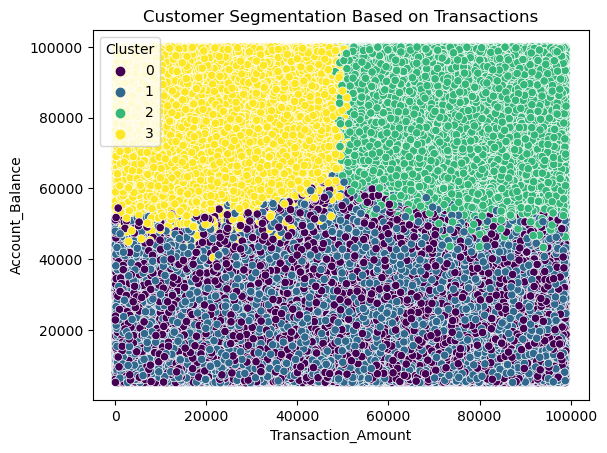

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="Transaction_Amount", y="Account_Balance", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Based on Transactions")
plt.show()


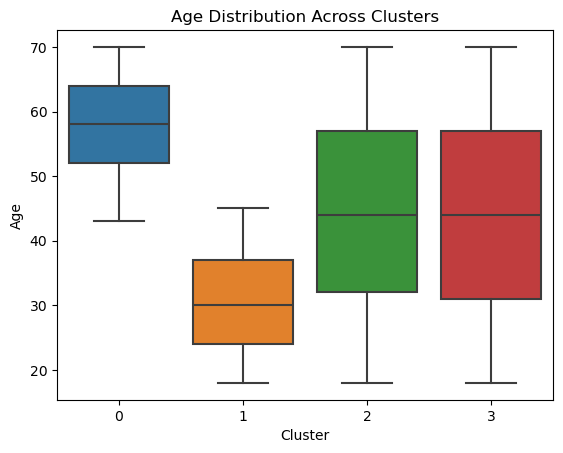

In [37]:
sns.boxplot(data=df, x="Cluster", y="Age")
plt.title("Age Distribution Across Clusters")
plt.show()


## Conclusion:  
*Although the dataset has been updated, I have confirmed that the informative columns remain identical to the previous version. Therefore, the analysis for this part remains unchanged from the old version, and I will not repeat it here.*

In [20]:
#######################
# 1. Install & Import Required Libraries
#######################
!pip install category_encoders optuna xgboost scikit-learn pandas matplotlib seaborn gitpython

import os
import git
import zipfile
import optuna
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from category_encoders import TargetEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


In [2]:
#######################
# 2. Clone GitHub Repository
#######################
repo_url = "https://github.com/McGill-MMA-EnterpriseAnalytics/Fraud-Detection.git"
repo_path = "/content/Fraud-Detection"
!git clone $repo_url $repo_path


Cloning into '/content/Fraud-Detection'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 107 (delta 31), reused 21 (delta 18), pack-reused 56 (from 1)
Receiving objects: 100% (107/107), 78.73 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [3]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [4]:
#######################
# 3. Extract Preprocessing Files
#######################
!unrar x /content/Fraud-Detection/data/processed_dataset.rar /content/Fraud-Detection/data/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Fraud-Detection/data/processed_dataset.rar


Would you like to replace the existing file /content/Fraud-Detection/data/content/processed_test_set.csv
5451326 bytes, modified on 2025-02-26 18:21
with a new one
5451326 bytes, modified on 2025-02-26 18:21

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


In [25]:
#######################
# 4. Load Train & Test Data
#######################

train_df = pd.read_csv("/content/Fraud-Detection/data/content/processed_train_set.csv")
test_df = pd.read_csv("/content/Fraud-Detection/data/content/processed_test_set.csv")

In [19]:
train_df.head()

,Age,State,City,Transaction_Amount,Merchant_Category,Account_Balance,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,...,Account_Type_Checking,Account_Type_Savings,Transaction_Type_Online,Transaction_Type_POS,Transaction_Device_Mobile,Transaction_Device_POS Terminal,Transaction_Device_Web,Time_Category_Evening,Time_Category_Morning,Time_Category_Night
0,55,6,3,82.117696,4,5967.793219,5,2,0,4,...,False,False,False,True,False,False,True,False,False,False
1,59,2,1,74.399478,5,2539.502154,3,2,0,3,...,False,True,False,True,False,False,False,False,True,False
2,63,2,3,74.908080,0,4239.124607,3,2,0,2,...,False,True,True,False,False,False,False,False,False,False
3,48,0,1,540.199955,3,4981.358229,6,0,1,3,...,False,True,True,False,False,False,False,True,False,False
4,23,5,5,79.173752,0,6824.554127,1,2,0,2,...,False,True,False,False,False,True,False,True,False,False


In [26]:
#######################
# 2. Remove Transaction_Location from the Dataset (Data Leakage Prevention)
#######################
train_df = train_df.drop(columns=["Transaction_Location", "Transaction_Amount"], errors='ignore')
test_df = test_df.drop(columns=["Transaction_Location", "Transaction_Amount"], errors='ignore')

In [27]:
#######################
# 3. Apply Target Encoding to Merchant_Category
#######################

encoder = TargetEncoder(cols=["Merchant_Category"])
train_df["Merchant_Category"] = encoder.fit_transform(train_df["Merchant_Category"], train_df["Is_Fraud"])
test_df["Merchant_Category"] = encoder.transform(test_df["Merchant_Category"])

In [28]:
#######################
# 3. Prepare Features & Target
#######################
X = train_df.drop(columns=["Is_Fraud"])
y = train_df["Is_Fraud"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ensure test set features and labels are correctly extracted
X_test = test_df.drop(columns=["Is_Fraud"], errors='ignore')
y_test = test_df["Is_Fraud"] if "Is_Fraud" in test_df.columns else None


In [29]:
#######################
# 5. Define Optuna Objective Function for Hyperparameter Tuning
#######################
def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": "gbtree",
        "lambda": trial.suggest_float("lambda", 5.0, 20.0, log=True),
        "alpha": trial.suggest_float("alpha", 5.0, 20.0, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 5),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "min_child_weight": trial.suggest_int("min_child_weight", 10, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    }

    model = xgb.XGBClassifier(**params, use_label_encoder=False, verbosity=0)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc').mean()
    return score


In [30]:
#######################
# 6. Run Optuna Optimization
#######################
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best Hyperparameters:", study.best_params)


[I 2025-02-26 20:34:45,838] A new study created in memory with name: no-name-0ee82c02-8ee8-4b45-8463-6376f36fca2c
[I 2025-02-26 20:34:51,605] Trial 0 finished with value: 0.9999746858798962 and parameters: {'lambda': 9.737864142784929, 'alpha': 11.066167578923855, 'max_depth': 4, 'learning_rate': 0.060606628144007496, 'n_estimators': 304, 'min_child_weight': 13, 'subsample': 0.6724126195164526, 'colsample_bytree': 0.7040738934109703}. Best is trial 0 with value: 0.9999746858798962.
[I 2025-02-26 20:34:56,947] Trial 1 finished with value: 0.987058343608991 and parameters: {'lambda': 18.643966858433913, 'alpha': 14.581177100714612, 'max_depth': 3, 'learning_rate': 0.025819273590187434, 'n_estimators': 182, 'min_child_weight': 20, 'subsample': 0.7500753329365386, 'colsample_bytree': 0.9896358804565084}. Best is trial 0 with value: 0.9999746858798962.
[I 2025-02-26 20:35:01,447] Trial 2 finished with value: 0.9997466290967623 and parameters: {'lambda': 6.542516925459357, 'alpha': 10.200759

Best Hyperparameters: {'lambda': 11.552918430516232, 'alpha': 6.377279950730096, 'max_depth': 5, 'learning_rate': 0.28901944369301596, 'n_estimators': 260, 'min_child_weight': 15, 'subsample': 0.9732543725514585, 'colsample_bytree': 0.9184564157773536}


In [31]:
#######################
# 7. Train Final XGBoost Model with Best Parameters
#######################
best_params = {
    "lambda": 18.035420264774213,
    "alpha": 6.134039170033844,
    "max_depth": 2,
    "learning_rate": 0.01405371208315621,
    "n_estimators": 431,
    "min_child_weight": 17,
    "subsample": 0.56404781868734,
    "colsample_bytree": 0.8738544807326076
}

final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, verbosity=0)
final_model.fit(X_train, y_train)


XGBClassifier(alpha=6.134039170033844, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8738544807326076, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=18.035420264774213,
              learning_rate=0.01405371208315621, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=17, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=431, n_jobs=None, ...)

ROC AUC Score: 0.9867581275201613
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     29760
           1       0.74      0.53      0.62      2240

    accuracy                           0.95     32000
   macro avg       0.86      0.76      0.80     32000
weighted avg       0.95      0.95      0.95     32000



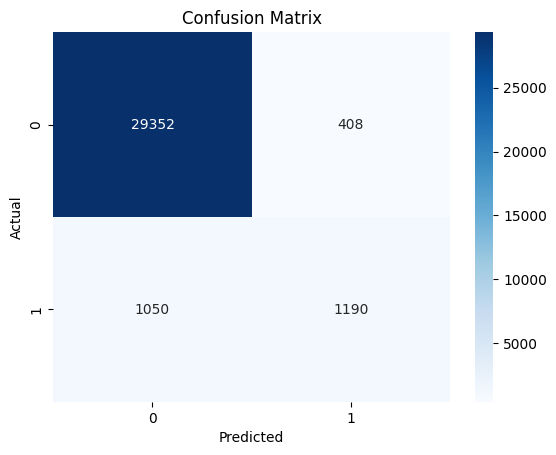

In [32]:
#######################
# 8. Model Evaluation
#######################
y_pred = final_model.predict(X_valid)
y_prob = final_model.predict_proba(X_valid)[:, 1]

print("ROC AUC Score:", roc_auc_score(y_valid, y_prob))
print("Classification Report:\n", classification_report(y_valid, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC AUC Score (Test): 0.9869806067588326
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     37200
           1       0.74      0.49      0.59      2800

    accuracy                           0.95     40000
   macro avg       0.85      0.74      0.78     40000
weighted avg       0.95      0.95      0.95     40000



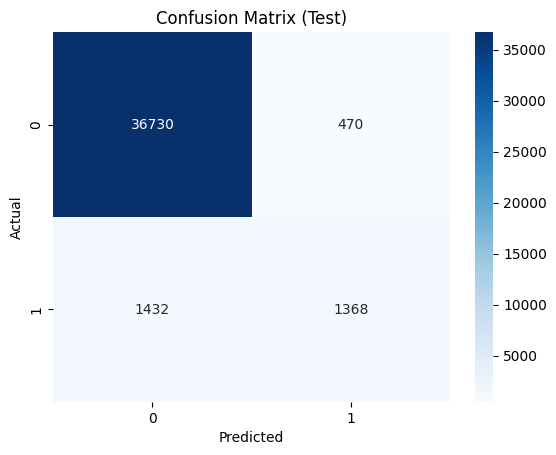

In [33]:
#######################
# 8. Predictions and Evaluation on Test Set
#######################
y_test_pred = final_model.predict(X_test)
y_test_prob = final_model.predict_proba(X_test)[:, 1]

print("ROC AUC Score (Test):", roc_auc_score(y_test, y_test_prob))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()

In [34]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(10))


                            Feature  Importance
3                 Merchant_Category    0.262213
7                   Transaction_Day    0.242981
5                       Device_Type    0.184776
17        Transaction_Device_Mobile    0.158396
18  Transaction_Device_POS Terminal    0.151633
0                               Age    0.000000
13            Account_Type_Checking    0.000000
21            Time_Category_Morning    0.000000
20            Time_Category_Evening    0.000000
19           Transaction_Device_Web    0.000000


In [38]:
import joblib

# Save the trained XGBoost model in the current directory
model_filename = "xgboost_fraud_model.pkl"
joblib.dump(final_model, model_filename)

print(f"Trained model saved as: {model_filename}")


Trained model saved as: xgboost_fraud_model.pkl
